In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import ES3 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [2]:
def estatisticas(dado_boia, results_modelo):
    """
    Calcula as estatisticas dos resultados do modelo
    dado_boia = coluna com dados da boia do dataframe (a priori, hs)
    result_modelo = coluna com resultados do modelo do dataframe (a priori, hs)
    """

    corr = dado_boia.corr(results_modelo)  # modelo e dado
    bias = np.mean(results_modelo-dado_boia)  # modelo e dado
    rmse = np.sqrt(np.sum((results_modelo - dado_boia)**2) /len(dado_boia))  # modelo e dado
    si = rmse/np.mean(dado_boia)  # dado
    N = len(dado_boia.dropna())  
    
    return corr, bias, rmse,  si,  N

In [3]:
df_era = pd.DataFrame()
era5_path = os.getcwd() + '/era5'
files = os.listdir(era5_path)
files.sort()
for i in files:
    ds = xr.open_dataset(era5_path + '/' + i)
    df = ds.sel(longitude=-43, latitude=-23).to_dataframe()
    df.pop('latitude')
    df.pop('longitude')
    df_era = df_era.append(df)

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/2048315364.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_era = df_era.append(df)
/var/folders/4n/w3sl

In [4]:
boia1 = ES3.trata_dado('dados/SIMCOSTA_RJ-1_OCEAN_2015-07-29_2016-10-13.csv')
# boia1.columns = ['Hs1', 'Tp1', 'Dir1', 'DirN1', 'Decl1']
boia1.columns = ['Hs1', 'Dir1', 'DirN1', 'Decl1', 'Tp1']

In [5]:
boia2 = ES3.trata_dado('dados/SIMCOSTA_RJ-2_OCEAN_2015-07-29_2016-12-20.csv')
# boia2.columns = ['Hs2', 'Tp2', 'Dir2', 'DirN2', 'Decl2']
boia2.columns = ['Hs2', 'Tp2', 'DirN2']

In [6]:
boia3 = ES3.trata_dado('dados/SIMCOSTA_RJ-3_OCEAN_2016-07-14_2022-01-26.csv')
# boia3.columns = ['Hs3', 'Tp3,', 'Dir3', 'DirN3', 'Decl3']
boia3.columns = ['Hs3', 'Dir3', 'DirN3', 'Decl3', 'Tp3']
boia3 = boia3[:'2021-12-31']

In [7]:
boia4 = ES3.trata_dado('dados/SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv')
boia4.columns = ['Hs4', 'Tp4', 'Dir4', 'DirN4', 'Decl4']
boia4 = boia4[:'2021-12-31']

In [8]:
geral = pd.concat([boia1, boia2, boia3, boia4, df_era], axis=1)

In [9]:
geral_treated = geral.resample('1H').mean()

In [10]:
geral_treated['Hs1'].index[0]

Timestamp('1979-01-01 00:00:00', freq='H')

In [11]:
hss = ['Hs1', 'Hs2', 'Hs3', 'Hs4']

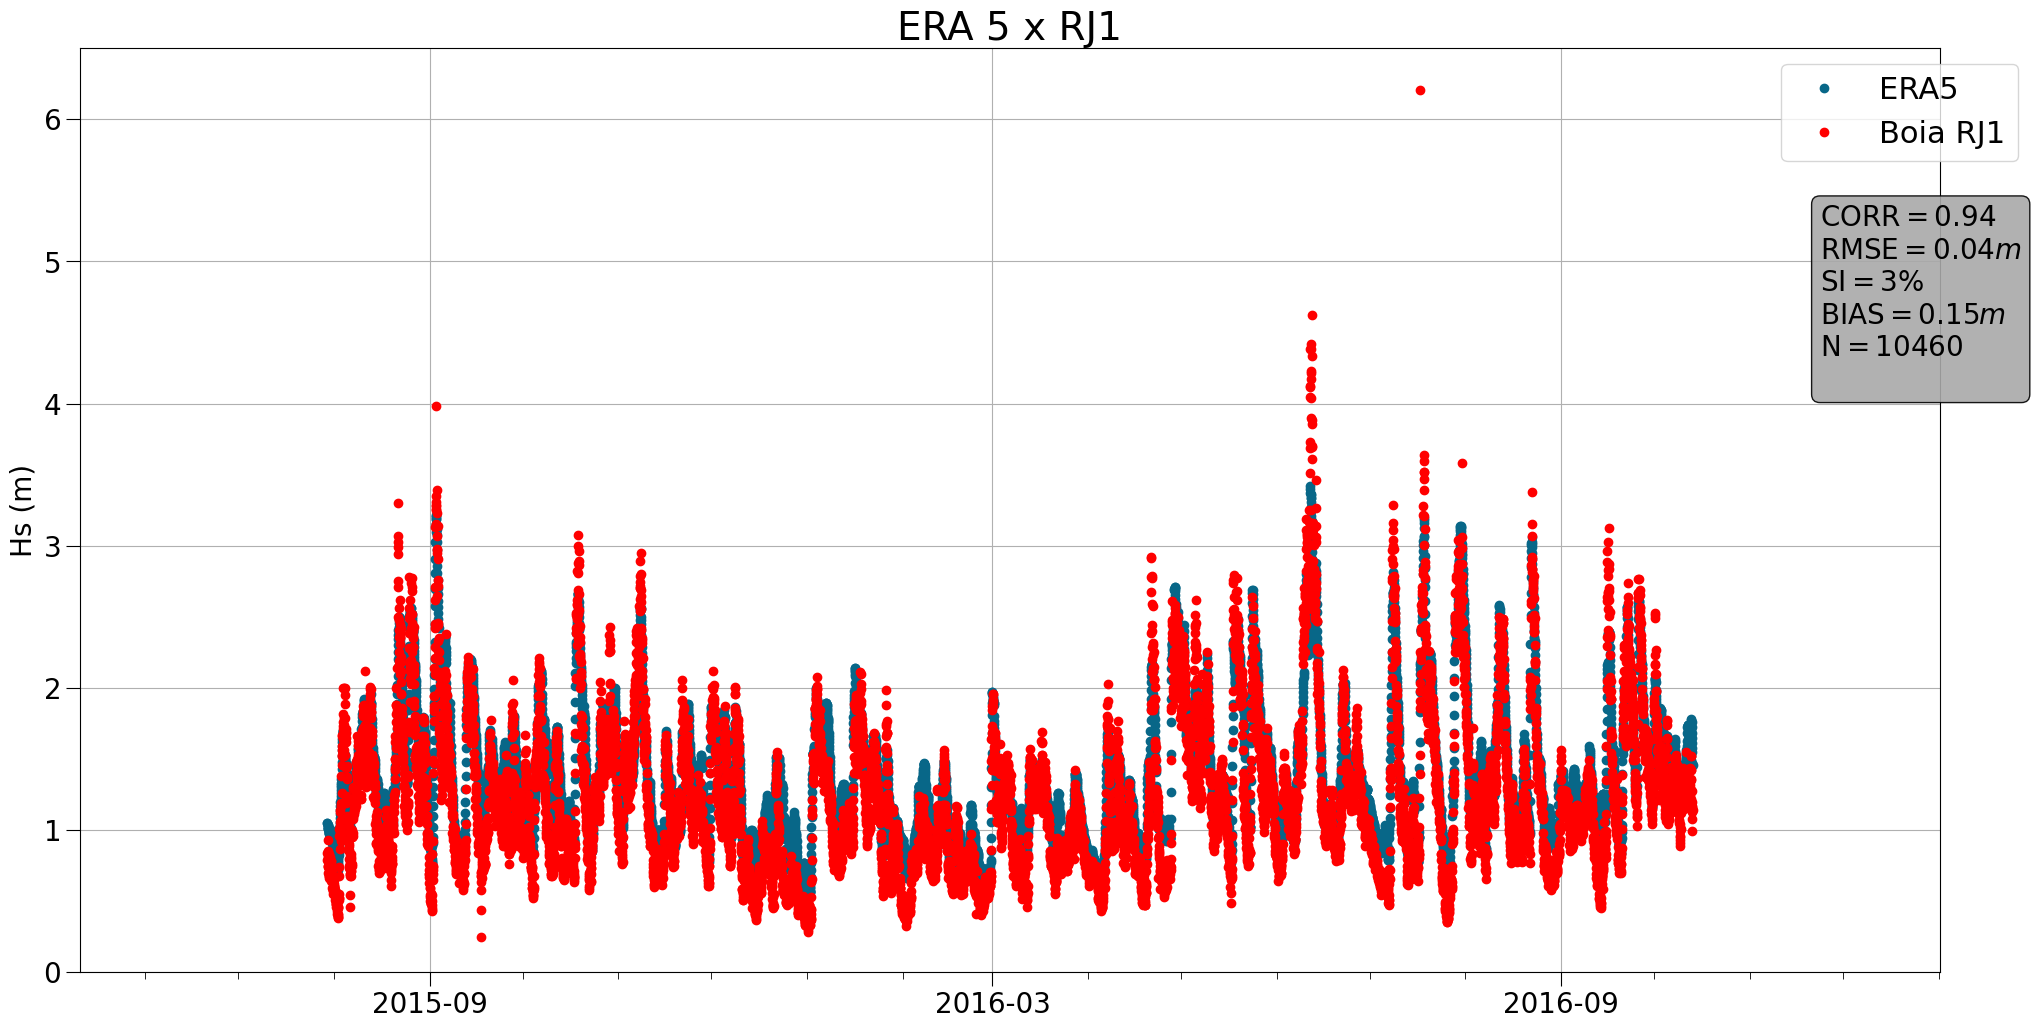

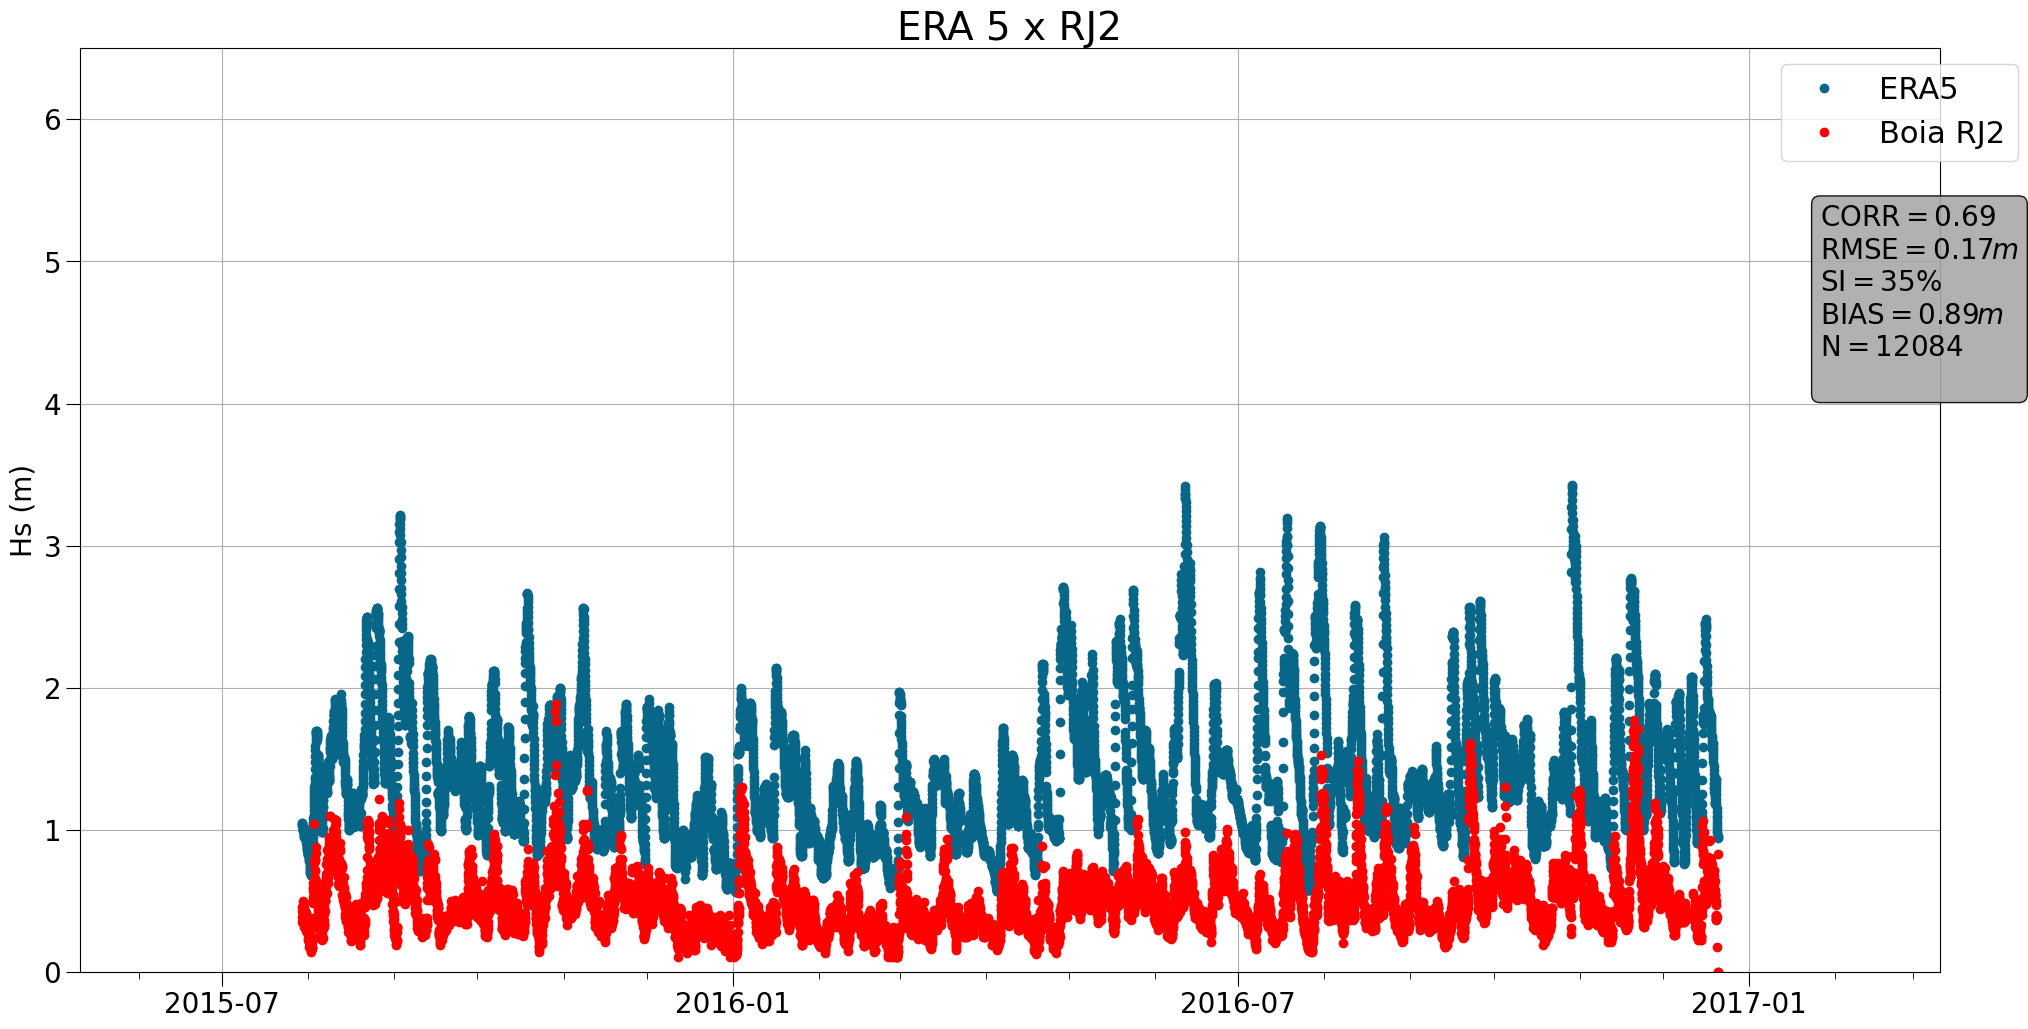

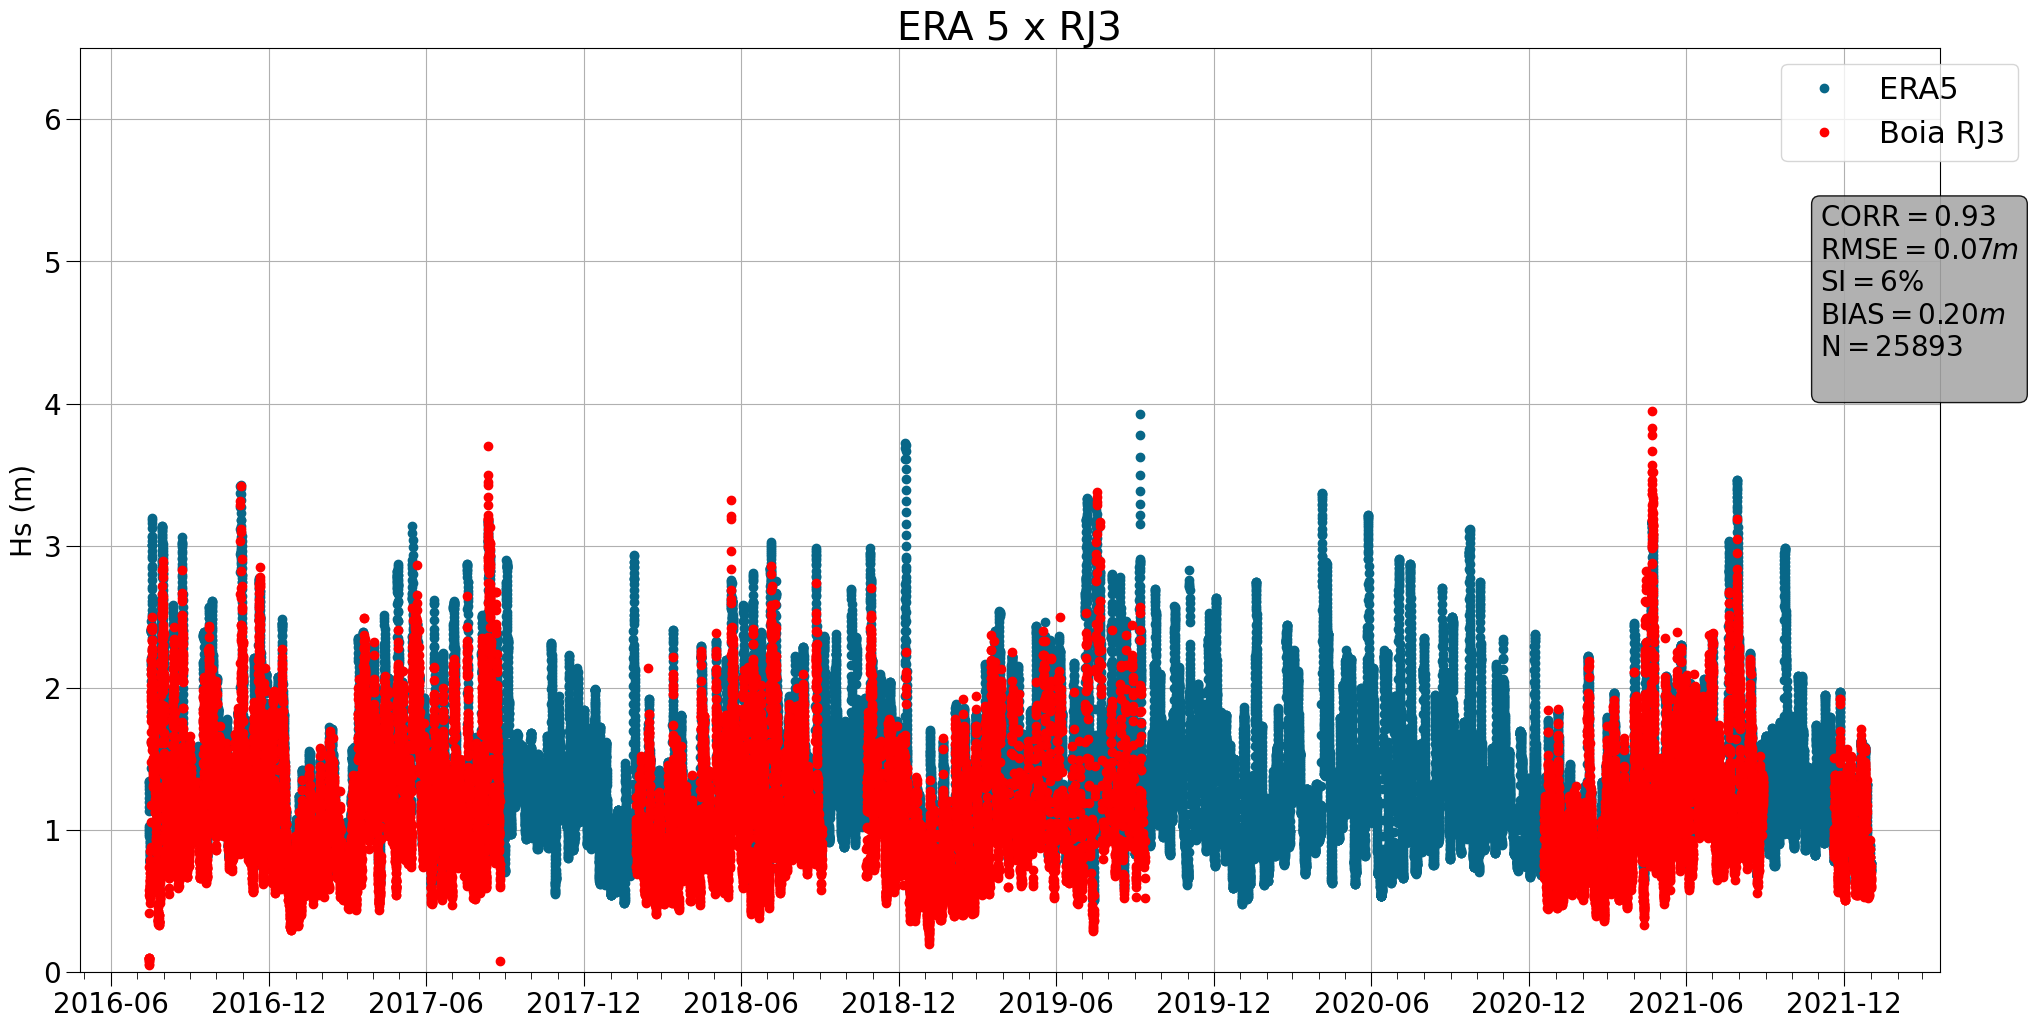

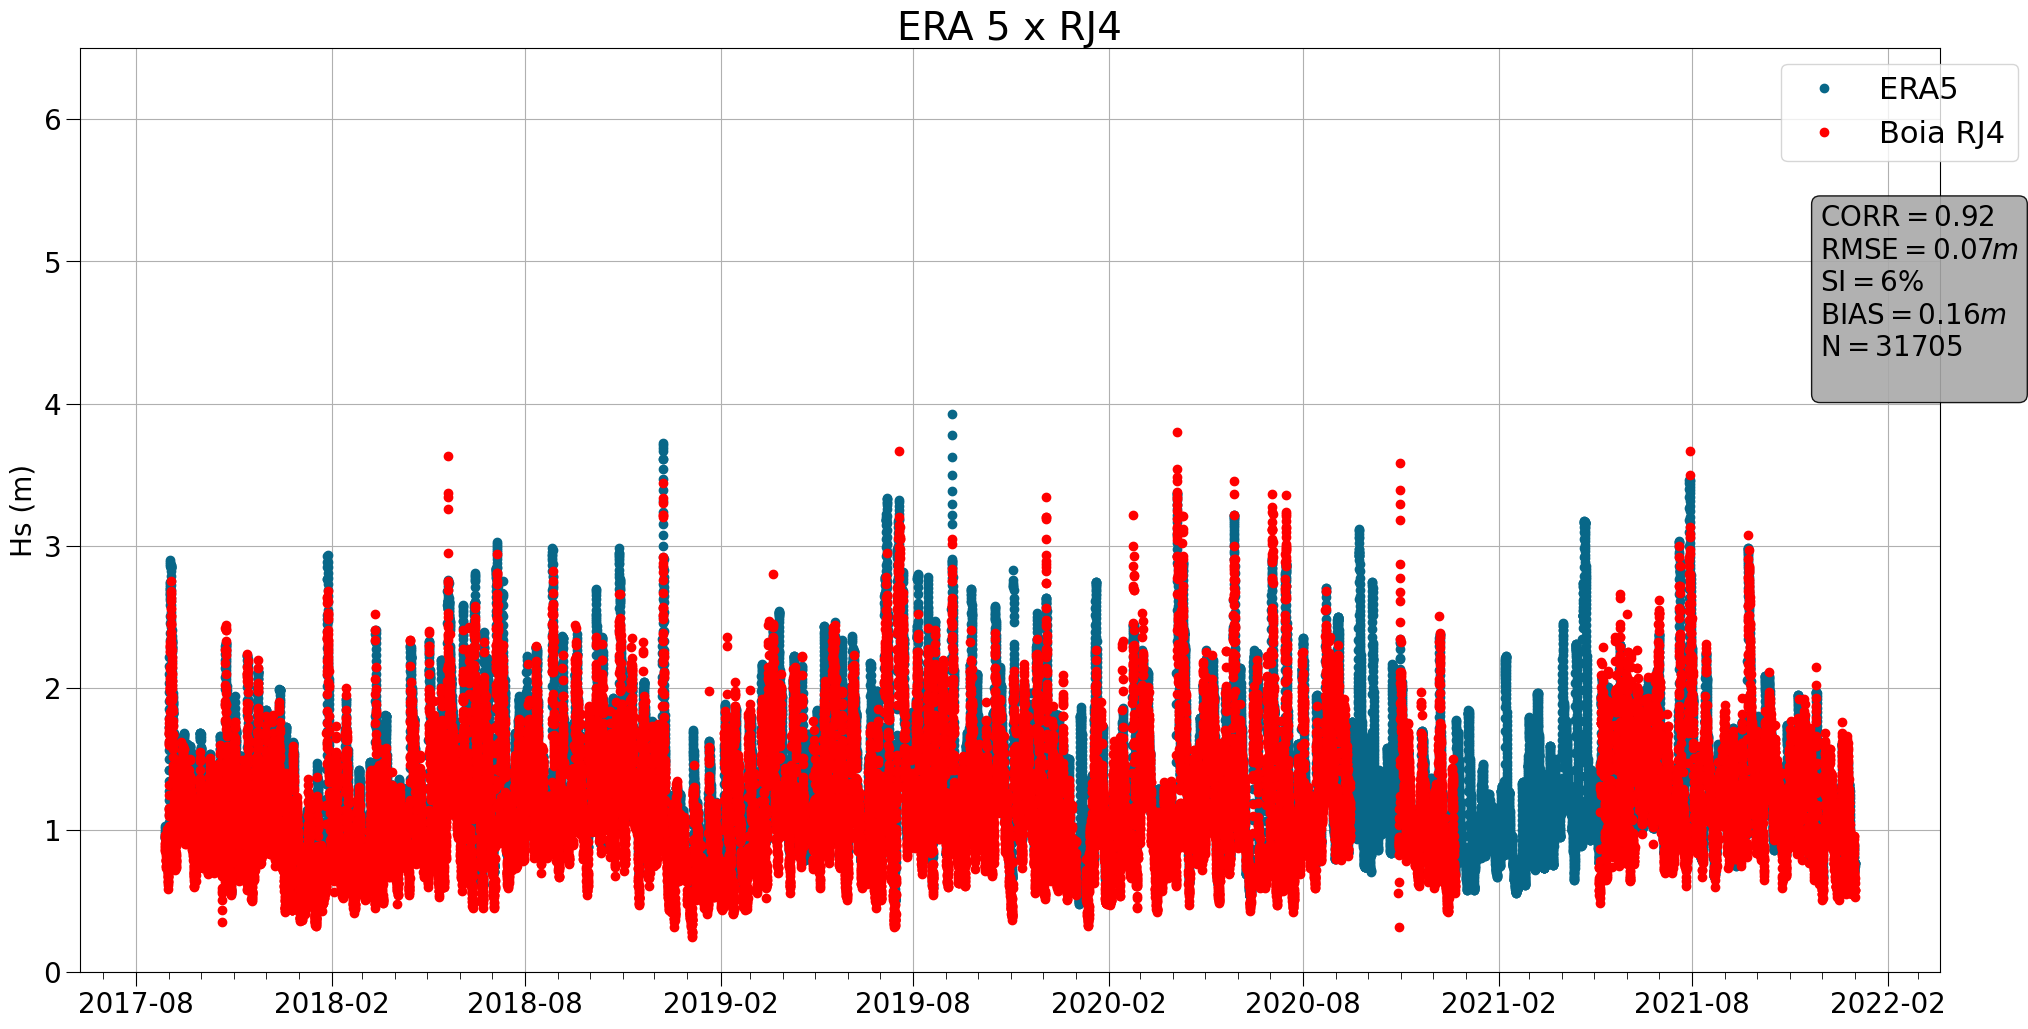

In [12]:
hss = ['Hs1', 'Hs2', 'Hs3', 'Hs4']

import os
figpath = os.getcwd()+'/fig/'

from datetime import timedelta

for i in hss:
    hsera5 = geral_treated['swh'][geral_treated[i].dropna().index[0]: geral_treated[i].dropna().index[-1]]
    
    fig = plt.figure(figsize=(24,12))

    ax = fig.add_subplot(111)
    ax.plot(hsera5, marker = 'o', color = '#086788', linestyle = 'none', label = 'ERA5')
    ax.plot(geral_treated[i], marker = 'o', color = 'red', linestyle = 'none', label='Boia RJ'+i[2])


    ax.grid()
    ax.set_ylabel('Hs (m)', fontsize = 20)

    ################################# data #######################

    # Major ticks every 6 months.
    fmt_half_year = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(fmt_half_year)

    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)

    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


    ax.tick_params(axis='both', which='major', labelsize=20, size=10)
    ax.tick_params(axis='both', which='minor', size=5)

    ax.set_ylim(0,6.5)
    
    ax.set_xlim(geral_treated[i].dropna().index[0] -timedelta(days=80) , geral_treated[i].dropna().index[-1] + timedelta(days=80))
    # ax.set_xlim(1,12)
    ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

    ###########################################################################

    plt.title('ERA 5 x RJ' + i[2], fontsize = 28)
    
    
    #################### METRICAS ESTATISTICAS ###################
    
    
    CORR, BIAS, RMSE, SI, N = estatisticas(geral_treated[i], geral_treated['swh'])
    
    
    textstr = '$\mathrm{CORR}=%.2f$\n$\mathrm{RMSE}=%.2f  m$\n$\mathrm{SI}=%.0f \%%$\n$\mathrm{BIAS}=%.2f m$\n$\mathrm{N}=%.0f$\n ' % (
    CORR, RMSE, SI*100, BIAS, N)
# Caracteristicas da caixa de texto
    props = dict(boxstyle='round', facecolor='darkgray', alpha=0.9)
    # ax.text(hsera5.index[int(len(geral_treated[i].dropna())/2)], 5.5, textstr, fontsize=20,
    #      verticalalignment='top', bbox=props)  # Unindo caixa e texto
    trans = fig.transFigure
    plt.text(0.85,0.75 , textstr, transform=trans, fontsize=20,
          verticalalignment='top', bbox=props)  # Unindo caixa e texto

    plt.savefig(figpath+'compara_era5_rj'+i[2]+'.png')

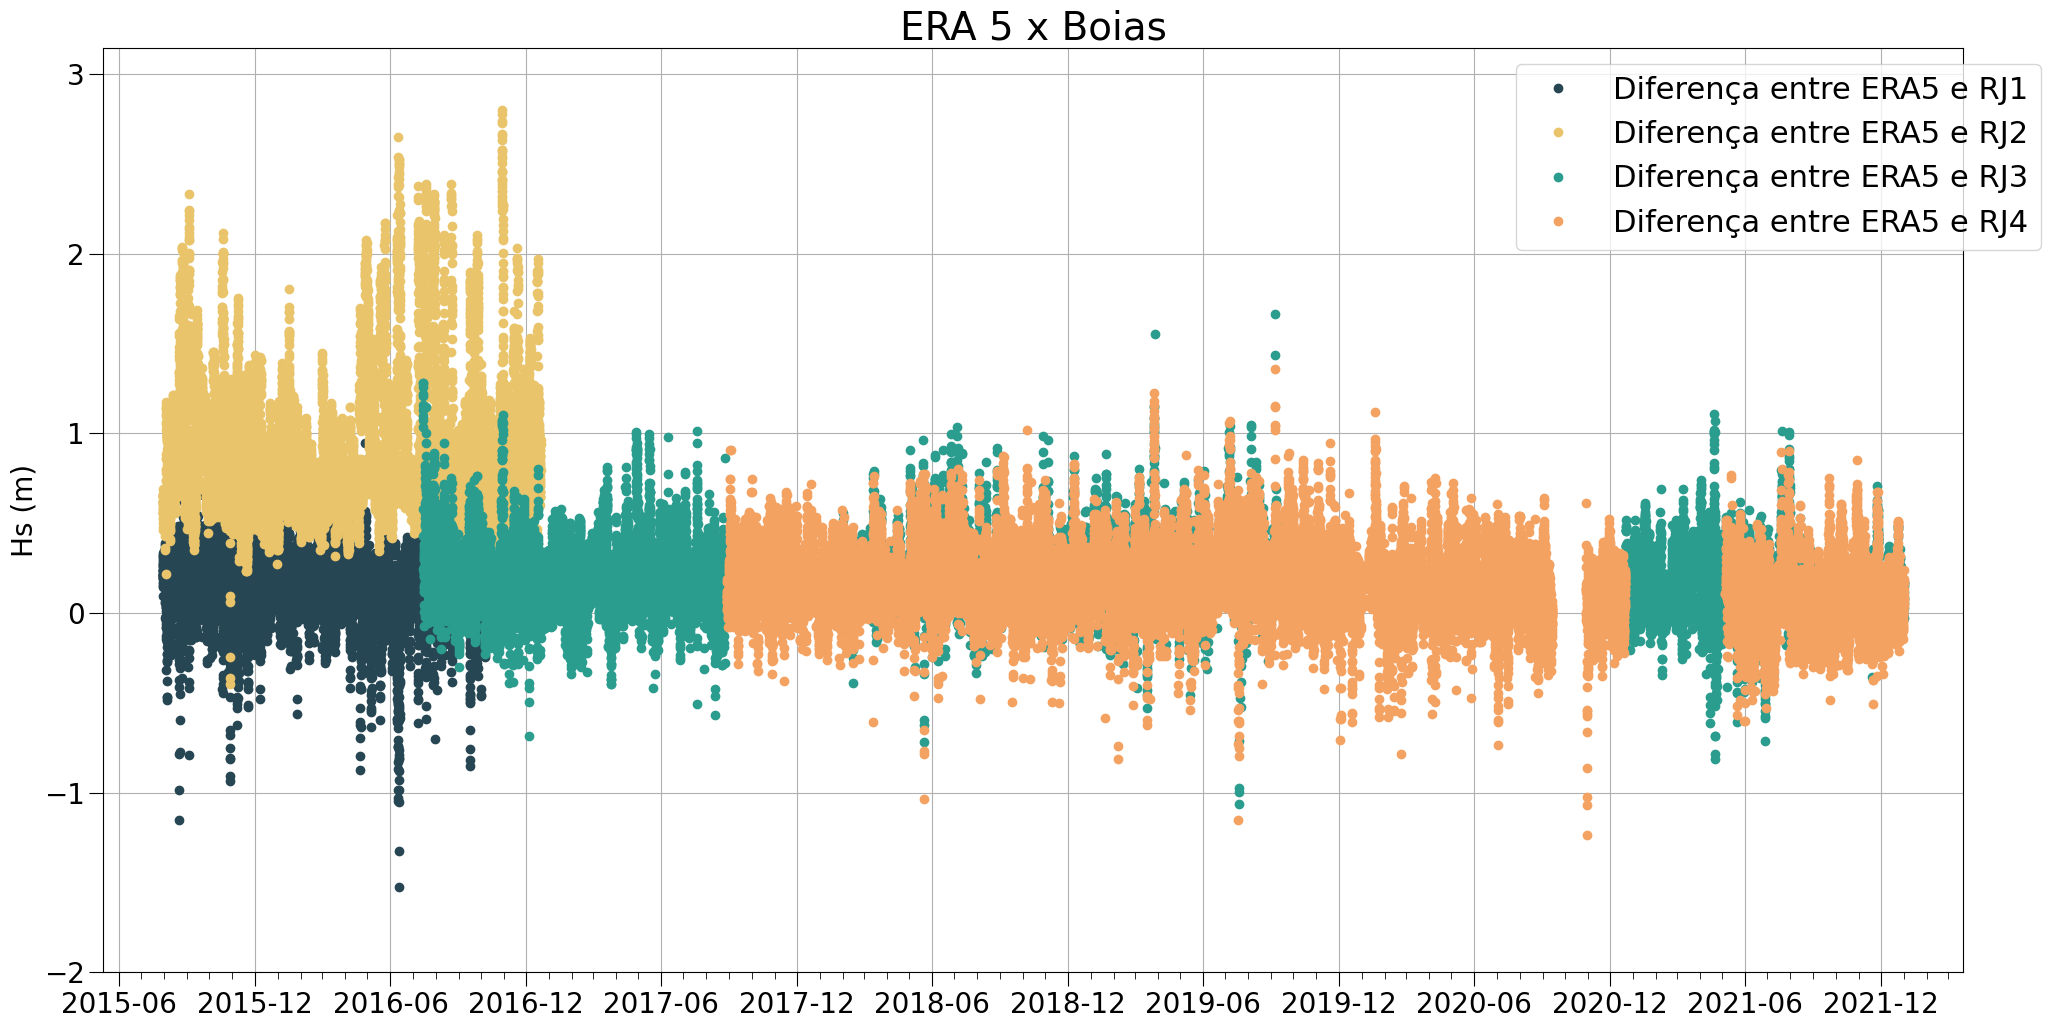

In [13]:

hsera5 = geral_treated['swh'][geral_treated['Hs1'].dropna().index[0]: geral_treated['Hs4'].dropna().index[-1]]

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
# ax.plot(hsera5, marker = 'o', color = 'red', linestyle = 'none', label = 'ERA5')
ax.plot(hsera5 - geral_treated['Hs1'], marker = 'o', color = '#264653', linestyle = 'none', label='Diferença entre ERA5 e RJ1')
ax.plot(hsera5 - geral_treated['Hs2'], marker = 'o', color = '#e9c46a', linestyle = 'none', label='Diferença entre ERA5 e RJ2')
ax.plot(hsera5 - geral_treated['Hs3'], marker = 'o', color = '#2a9d8f', linestyle = 'none', label='Diferença entre ERA5 e RJ3')
ax.plot(hsera5 - geral_treated['Hs4'], marker = 'o', color = '#f4a261', linestyle = 'none', label='Diferença entre ERA5 e RJ4')




ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(-2,)

ax.set_xlim(geral_treated['Hs1'].dropna().index[0] -timedelta(days=80) , geral_treated['Hs4'].dropna().index[-1] + timedelta(days=80))
# ax.set_xlim(1,12)
ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

###########################################################################

plt.title('ERA 5 x Boias', fontsize = 28)



plt.savefig(figpath+'compara_era5_boias.png')

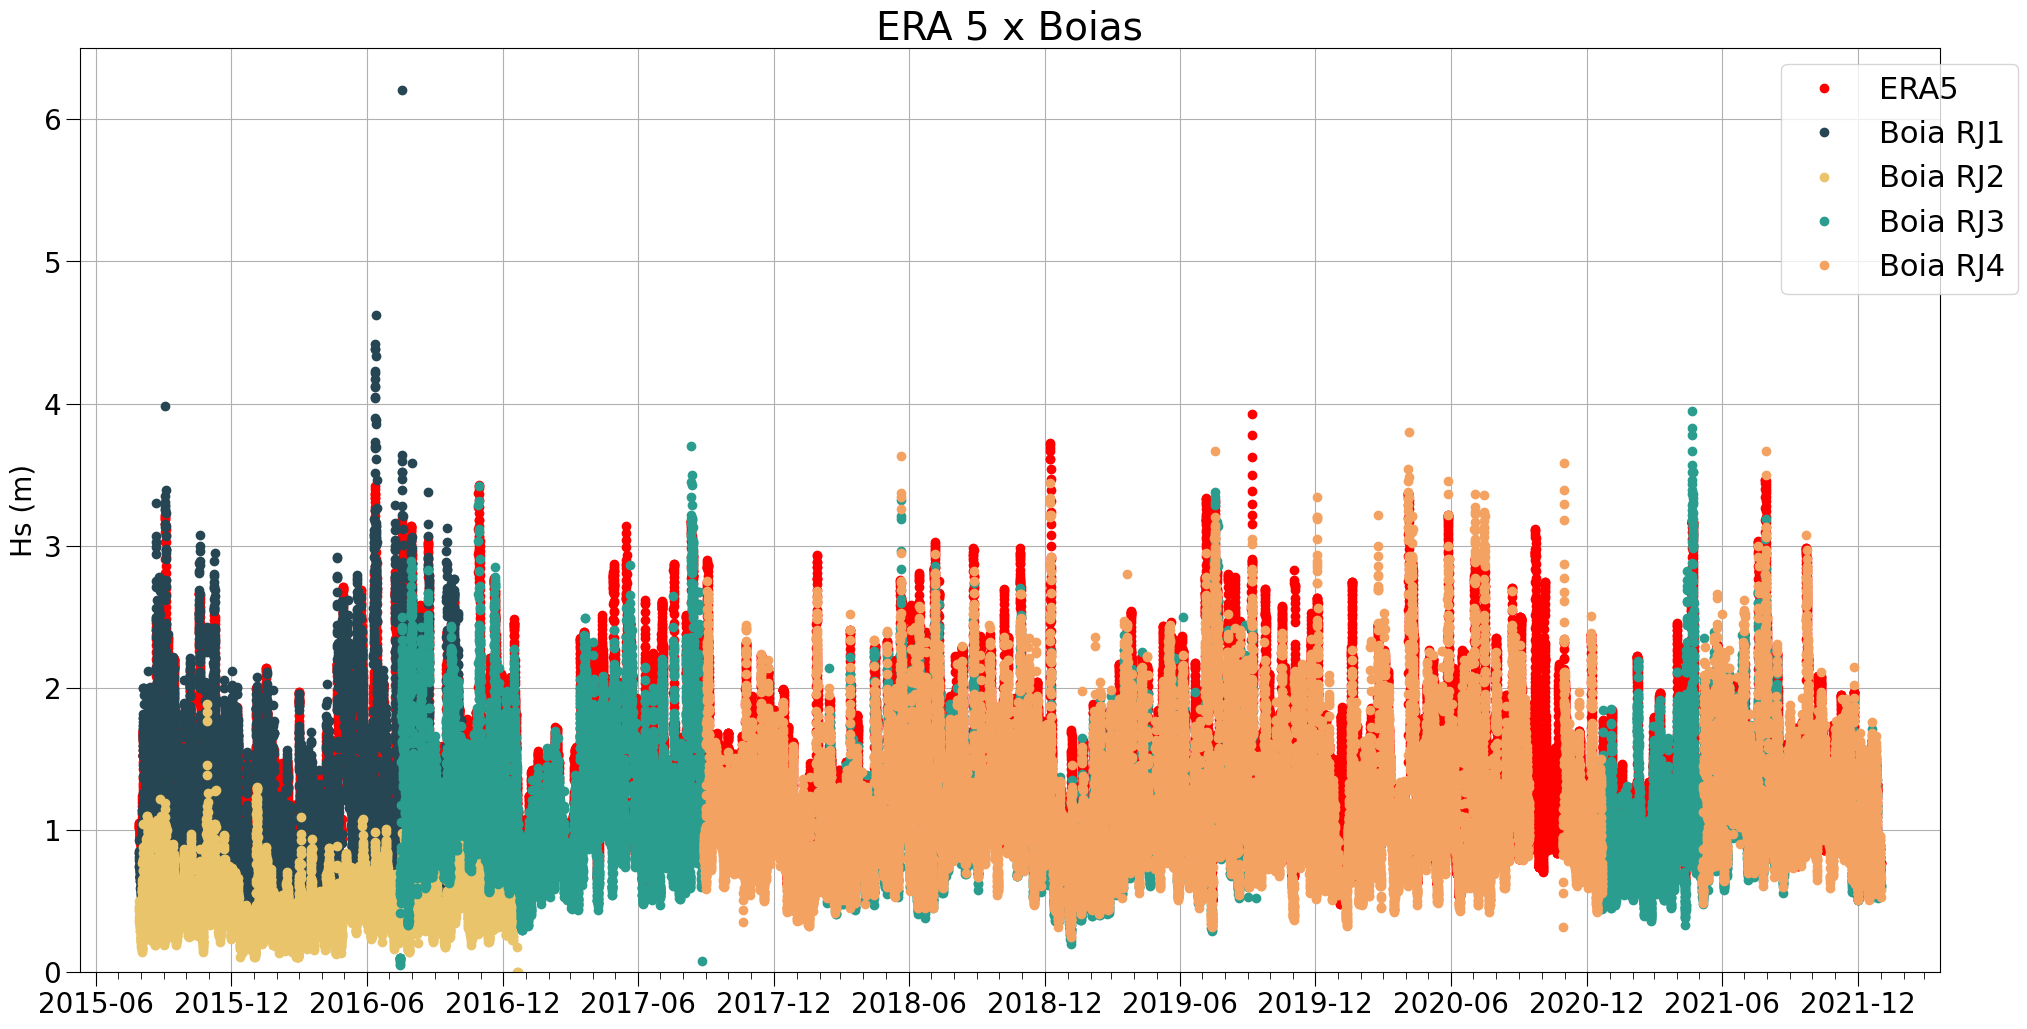

In [15]:

hsera5 = geral_treated['swh'][geral_treated['Hs1'].dropna().index[0]: geral_treated['Hs4'].dropna().index[-1]]

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(hsera5, marker = 'o', color = 'red', linestyle = 'none', label = 'ERA5')
ax.plot(geral_treated['Hs1'], marker = 'o', color = '#264653', linestyle = 'none', label='Boia RJ1')
ax.plot(geral_treated['Hs2'], marker = 'o', color = '#e9c46a', linestyle = 'none', label='Boia RJ2')
ax.plot(geral_treated['Hs3'], marker = 'o', color = '#2a9d8f', linestyle = 'none', label='Boia RJ3')
ax.plot(geral_treated['Hs4'], marker = 'o', color = '#f4a261', linestyle = 'none', label='Boia RJ4')




ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_ylim(0,6.5)

ax.set_xlim(geral_treated['Hs1'].dropna().index[0] -timedelta(days=80) , geral_treated['Hs4'].dropna().index[-1] + timedelta(days=80))
# ax.set_xlim(1,12)
ax.legend(fontsize = 22, bbox_to_anchor=(1.05, 1))

###########################################################################

plt.title('ERA 5 x Boias', fontsize = 28)



plt.savefig(figpath+'compara_era5_boias.png')

# Fazendo a comparacao do ERA5 agora

In [16]:
arr_douglas = []
arr_cond = []
arr_risco = []
arr_criti = []

lims_douglas = [(-1,0), (0,0.1), (0.1, 0.5), (0.5, 1.25), (1.25,2.5),(2.5,4),(4,6),(6,9),(9,14),(14,100)] # limites escala douglas
niveis_douglas = ['calmo', 'encrespado', 'suave', 'fraco', 'moderado', 'grosso', 'muito grosso',
          'alto', 'muito alto', 'fenomenal']

lims_cond = [(0,0.5),(0.5,1.5),(1.5,2.5),(2.5,100)]
niveis_cond = ['calmo_cond','fraco_cond','moderado_cond','forte_cond']

lims_risco = [(0,1.5),(1.5,2),(2,2.5),(2.5,100)]
niveis_risco = ['-','baixo_risco','moderado_risco','alto_risco']

lims_criti = [(0,2),(2,2.5),(2.5,3.5),(3.5,100)]
niveis_criti = ['normalidade','mobilizacao','atencao','alerta']


for i in lims_douglas:
    arr_douglas.append(df_era['swh'].between(i[0],i[1]))
    
for j,k,l in zip(lims_cond,lims_risco,lims_criti):
    arr_cond.append(df_era['swh'].between(j[0],j[1]))
    arr_risco.append(df_era['swh'].between(k[0],k[1]))
    arr_criti.append(df_era['swh'].between(l[0],l[1]))


for i,j in zip(arr_douglas, niveis_douglas):
    df_era[j] = i
    
for i,j in zip(arr_cond, niveis_cond):
    df_era[j] = i
    
for i,j in zip(arr_risco, niveis_risco):
    df_era[j] = i
    
for i,j in zip(arr_criti, niveis_criti):
    df_era[j] = i
    
    
        

In [17]:
verao = df_era[(df_era.index.month<4)]
outono = df_era[(df_era.index.month>3) & (df_era.index.month<7)]
inverno = primavera = df_era[(df_era.index.month>6) & (df_era.index.month<10)]
primavera = df_era[(df_era.index.month>9)]

# Fazendo Histogramas

In [18]:
niveis_douglas_tudo_arr = []
niveis_cond_tudo_arr = []
niveis_risco_tudo_arr = []
niveis_criti_tudo_arr = []

for i in niveis_douglas:
    niveis_douglas_tudo_arr.append(df_era[i][df_era[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_tudo_arr.append(df_era[i][df_era[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_tudo_arr.append(df_era[i][df_era[i]==True].count())

for i in niveis_criti:
    niveis_criti_tudo_arr.append(df_era[i][df_era[i]==True].count())    


In [19]:
niveis_douglas_verao_arr = []
niveis_cond_verao_arr = []
niveis_risco_verao_arr = []
niveis_criti_verao_arr = []

for i in niveis_douglas:
    niveis_douglas_verao_arr.append(verao[i][verao[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_verao_arr.append(verao[i][verao[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_verao_arr.append(verao[i][verao[i]==True].count())

for i in niveis_criti:
    niveis_criti_verao_arr.append(verao[i][verao[i]==True].count())    


In [20]:
niveis_douglas_outono_arr = []
niveis_cond_outono_arr = []
niveis_risco_outono_arr = []
niveis_criti_outono_arr = []

for i in niveis_douglas:
    niveis_douglas_outono_arr.append(outono[i][outono[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_outono_arr.append(outono[i][outono[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_outono_arr.append(outono[i][outono[i]==True].count())

for i in niveis_criti:
    niveis_criti_outono_arr.append(outono[i][outono[i]==True].count())    


In [21]:
niveis_douglas_inverno_arr = []
niveis_cond_inverno_arr = []
niveis_risco_inverno_arr = []
niveis_criti_inverno_arr = []

for i in niveis_douglas:
    niveis_douglas_inverno_arr.append(inverno[i][inverno[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_inverno_arr.append(inverno[i][inverno[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_inverno_arr.append(inverno[i][inverno[i]==True].count())

for i in niveis_criti:
    niveis_criti_inverno_arr.append(inverno[i][inverno[i]==True].count())    


In [22]:
niveis_douglas_primavera_arr = []
niveis_cond_primavera_arr = []
niveis_risco_primavera_arr = []
niveis_criti_primavera_arr = []

for i in niveis_douglas:
    niveis_douglas_primavera_arr.append(primavera[i][primavera[i]==True].count())
    
for i in niveis_cond:
    niveis_cond_primavera_arr.append(primavera[i][primavera[i]==True].count())
    
for i in niveis_risco:
    niveis_risco_primavera_arr.append(primavera[i][primavera[i]==True].count())

for i in niveis_criti:
    niveis_criti_primavera_arr.append(primavera[i][primavera[i]==True].count())    


In [23]:
def plota_histograma_douglas(estacao):

    if estacao == 'verao':
        arr = niveis_douglas_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_douglas_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_douglas_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_douglas_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_douglas_primavera_arr
        nome_estacao = 'a Primavera'
    
    
    niveis_douglas = ['Calmo','Encrespado','Suave','Fraco', 'Moderado','Grosso',
         'Muito grosso', 'Alto', 'Muito alto','Fenomenal']
    
    fig, ax = plt.subplots(figsize = (18,6))
    ax.set_ylabel('%', fontsize = 16)
    ax.set_xticklabels(niveis_douglas, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p
    ax.set_yticklabels(range(0,55,10), fontsize = 16)  #  copiar mais facil.
    
    ax.bar(niveis_douglas, height=np.asarray(arr)/len(df_era)*100)
    
    ax.grid()
    #ax.set_yscale('log')
    #ax.set_ylim(1,10**5.5)
    # ax.set_title('Ocorrência dos Níveis da escala douglas para ' + nome_estacao)

    plt.savefig(figpath + 'histograma_douglas_'+estacao+'.png')

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


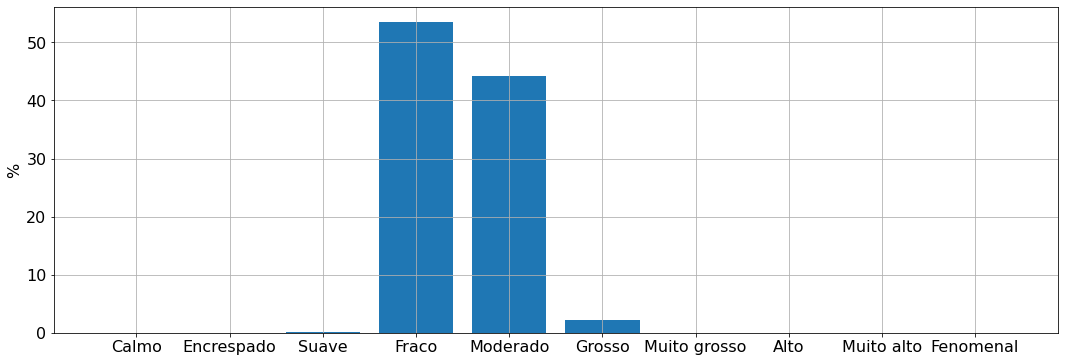

In [144]:
plota_histograma_douglas('tudo')

In [24]:
def plota_histograma_cond(estacao):
    if estacao == 'verao':
        arr = niveis_cond_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_cond_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_cond_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_cond_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_cond_primavera_arr
        nome_estacao = 'a Primavera'
    
    niveis_cond = ['Calmo','Fraco','Moderado','Forte']
    

    fig, ax = plt.subplots(figsize = (18,6))
    ax.set_ylabel('%', fontsize = 16)
    ax.set_xticklabels(niveis_cond, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p
    ax.set_yticklabels(range(0,75,10), fontsize = 16)  #  copiar mais facil.
    
    ax.bar(niveis_cond, height=np.asarray(arr)/len(df_era)*100)
    ax.grid()
    #ax.set_yscale('log')
    #ax.set_ylim(1,10**5.5)
    
    plt.savefig(figpath + 'histograma_cond_'+estacao+'.png')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/1118531102.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(niveis_cond, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/1118531102.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,75,10), fontsize = 16)  #  copiar mais facil.


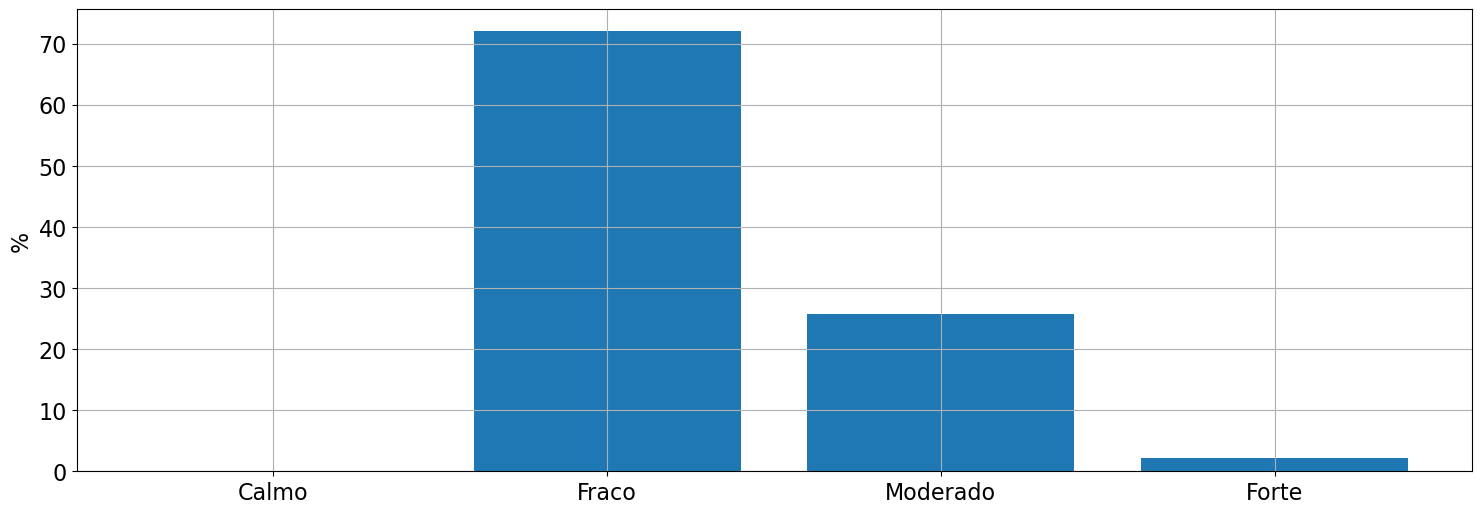

In [25]:
plota_histograma_cond('tudo')

In [26]:
def plota_histograma_risco(estacao):
    if estacao == 'verao':
        arr = niveis_risco_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_risco_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_risco_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_risco_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_risco_primavera_arr
        nome_estacao = 'a Primavera'
    
    niveis_risco = ['-', 'Baixo', 'Moderado', 'Alto']
    
    fig, ax = plt.subplots(figsize = (18,6))
    ax.set_ylabel('%', fontsize = 16)
    ax.set_xticklabels(niveis_risco, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p
    ax.set_yticklabels(range(0,75,10), fontsize = 16)  #  copiar mais facil.
    
    ax.bar(niveis_risco, height=np.asarray(arr)/len(df_era)*100)
    ax.grid()
    #ax.set_yscale('log')
    #ax.set_ylim(1,10**5.5)
    
    plt.savefig(figpath + 'histograma_risco_'+estacao+'.png')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/1036382001.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(niveis_risco, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/1036382001.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,75,10), fontsize = 16)  #  copiar mais facil.


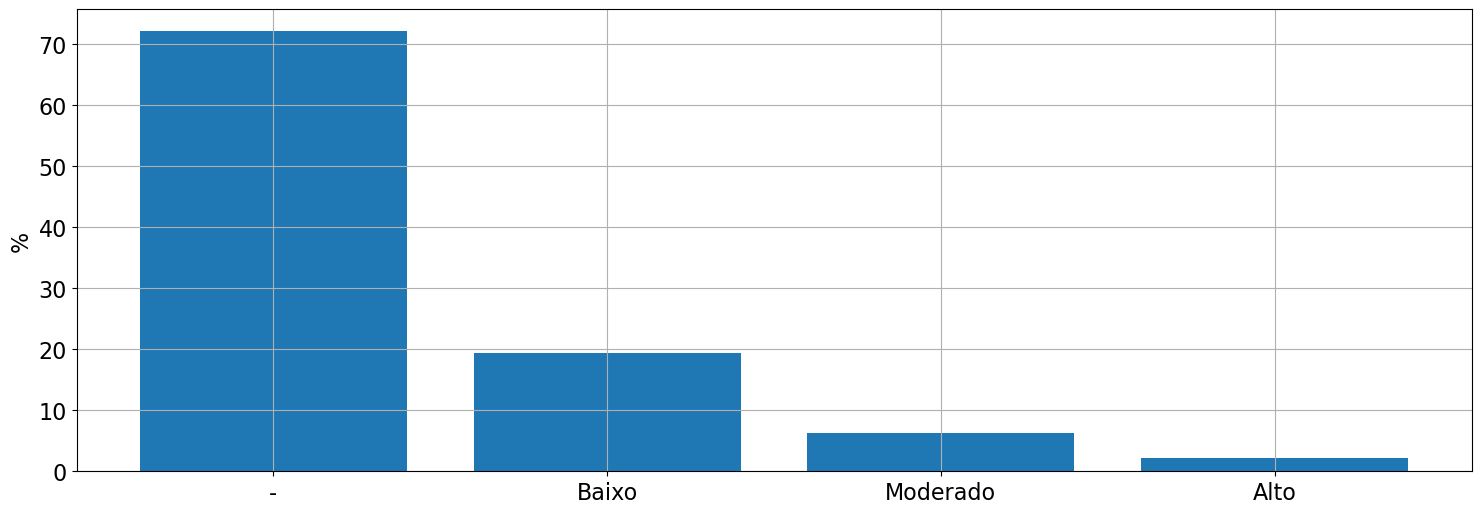

In [27]:
plota_histograma_risco('tudo')

In [28]:
def plota_histograma_criti(estacao):
    if estacao == 'verao':
        arr = niveis_criti_verao_arr
        nome_estacao = 'o Verão'
    elif estacao == 'outono':
        arr = niveis_criti_outono_arr
        nome_estacao = 'o Outono'
    elif estacao == 'inverno':
        arr = niveis_criti_inverno_arr
        nome_estacao = 'o Inverno'
    elif estacao == 'tudo':
        arr = niveis_criti_tudo_arr
        nome_estacao = 'o período total'
    else:
        arr = niveis_criti_primavera_arr
        nome_estacao = 'a Primavera'
    
    
    niveis_criti = ['Normalidade', 'Mobilização', 'Atenção', 'Alerta']
    
    fig, ax = plt.subplots(figsize = (18,6))
    ax.set_yticklabels(range(0,85,20), fontsize = 16)  #  copiar mais facil.
    ax.set_ylabel('%', fontsize = 16)
    
    ax.set_xticklabels(niveis_risco, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p
#     ax.set_yticklabels([0,10,20,30,40,50,60], fontsize = 16)  #  copiar mais facil.
    
    ax.bar(niveis_risco, height=np.asarray(arr)/len(df_era)*100)
    ax.grid()
    #ax.set_yscale('log')
    #ax.set_ylim(1,10**5.5)
    
    plt.savefig(figpath + 'histograma_criti_'+estacao+'.png')
    
    
    


/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/583756278.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,85,20), fontsize = 16)  #  copiar mais facil.
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/583756278.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(niveis_risco, fontsize = 16)  # isso geralmente viria depois, mas deixei antes p


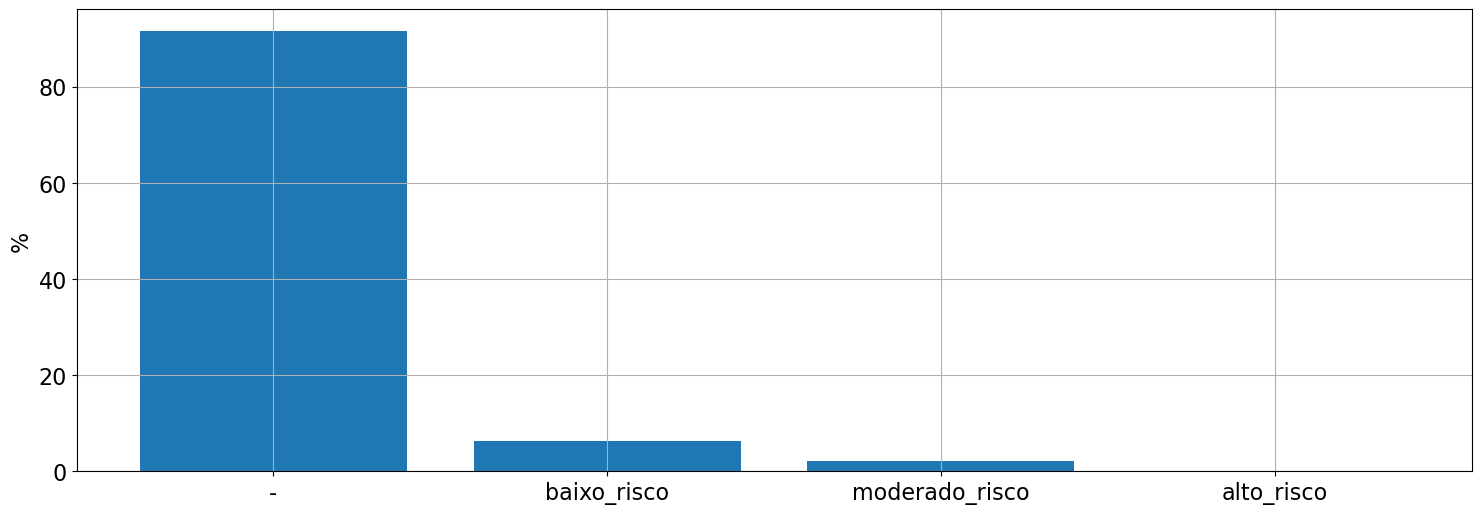

In [29]:
plota_histograma_criti('tudo')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/3219051784.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,75,10), fontsize = 16)


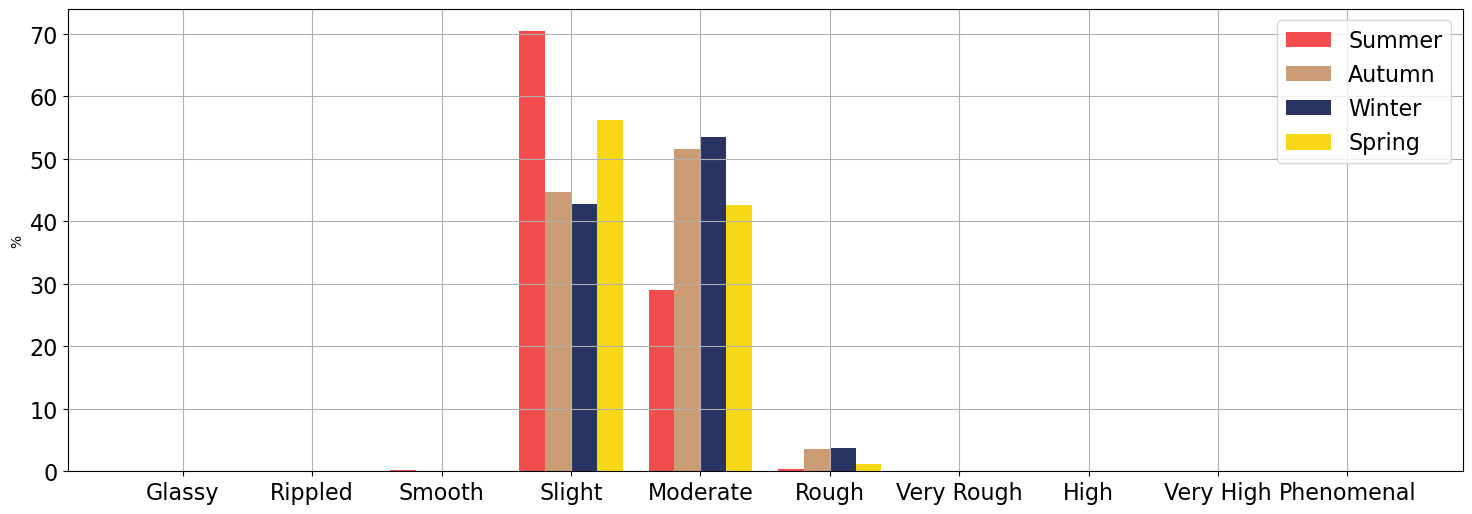

In [38]:
x = niveis_douglas = ['Glassy','Rippled','Smooth','Slight', 'Moderate','Rough',
         'Very Rough', 'High', 'Very High','Phenomenal']
    
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, np.asarray(niveis_douglas_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax.bar(x_axis-0.1, np.asarray(niveis_douglas_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax.bar(x_axis+0.1, np.asarray(niveis_douglas_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax.bar(x_axis+0.3, np.asarray(niveis_douglas_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax.set_xticks(x_axis, x)
ax.legend(fontsize = 16)
ax.grid()
# ax.set_yscale('log')
# ax.set_ylim(1,10**5.6)
ax.set_ylabel('%')
# ax.set_ylim(75/100)
ax.set_yticklabels(range(0,75,10), fontsize = 16)
ax.set_xticklabels(x, fontsize = 16)


# ax.set_title('Ocorrência dos Níveis da escala Douglas separado sazonalmente')

plt.savefig(figpath + 'histograma_douglas_sazonal.png')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/3910874966.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,95,10), fontsize = 16)


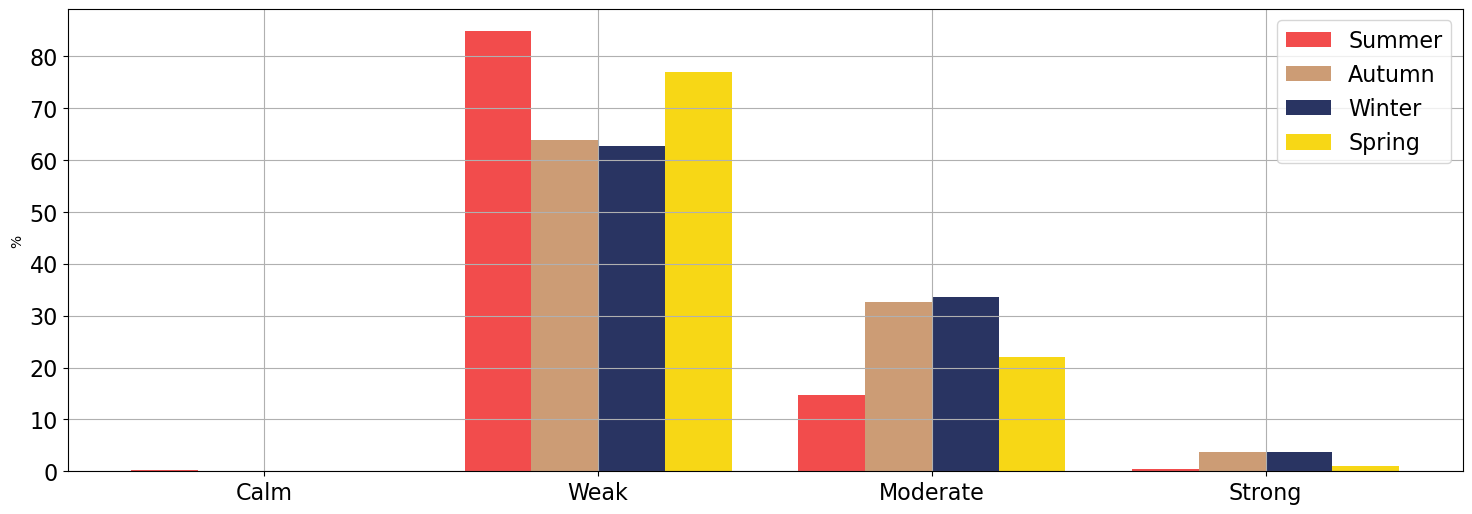

In [39]:
x = niveis_cond = ['Calm','Weak','Moderate','Strong']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, np.asarray(niveis_cond_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax.bar(x_axis-0.1, np.asarray(niveis_cond_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax.bar(x_axis+0.1, np.asarray(niveis_cond_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax.bar(x_axis+0.3, np.asarray(niveis_cond_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax.set_xticks(x_axis, x)
ax.legend(fontsize = 16)
ax.grid()
# ax.set_yscale('log')
# ax.set_ylim(1,10**5.6)
ax.set_ylabel('%')
# ax.set_ylim(95/100)
ax.set_yticklabels(range(0,95,10), fontsize = 16)
ax.set_xticklabels(x, fontsize = 16)
# ax.set_title('Ocorrência dos Níveis da escala de Condição separado sazonalmente')

plt.savefig(figpath + 'histograma_cond_sazonal.png')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/3864747155.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,101,20), fontsize = 16)


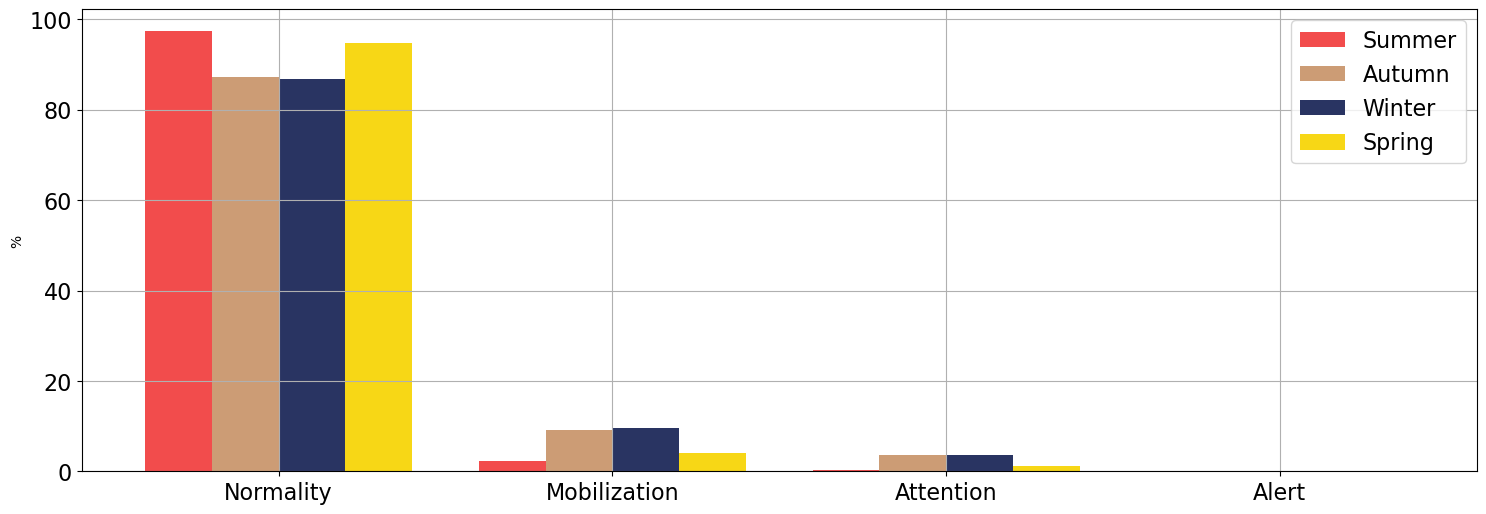

In [40]:
x = ['Normality', 'Mobilization', 'Attention', 'Alert']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, np.asarray(niveis_criti_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax.bar(x_axis-0.1, np.asarray(niveis_criti_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax.bar(x_axis+0.1, np.asarray(niveis_criti_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax.bar(x_axis+0.3, np.asarray(niveis_criti_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax.set_xticks(x_axis, x)
ax.legend(fontsize=16)
ax.grid()
# ax.set_yscale('log')
# ax.set_ylim(1,10**5.6)
ax.set_ylabel('%')
ax.set_yticklabels(range(0,101,20), fontsize = 16)
ax.set_xticklabels(x, fontsize = 16)
# ax.set_xticklabels(x, fontsize = 16)ax.set_title('Ocorrência dos Níveis da escala de Criticidade separado sazonalmente')

plt.savefig(figpath + 'histograma_criti_sazonal.png')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/3709612512.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,101,10), fontsize = 16)


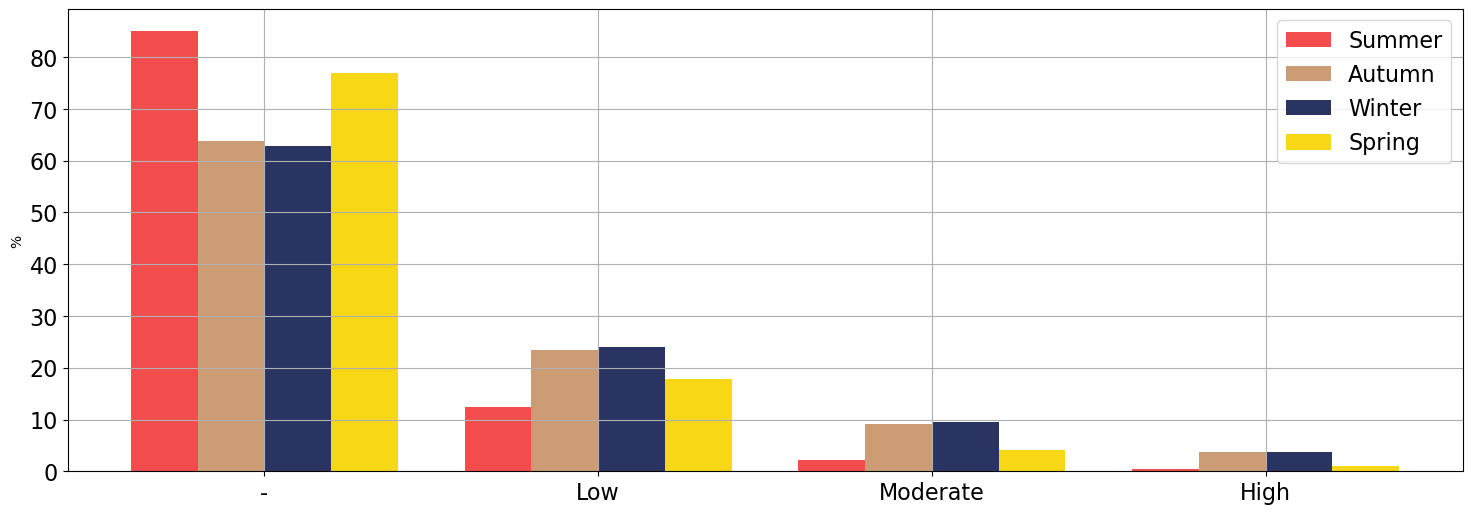

In [41]:
x = ['-', 'Low', 'Moderate', 'High']
x_axis = np.arange(len(x))

fig, ax = plt.subplots(figsize = (18,6))

ax.bar(x_axis-0.3, np.asarray(niveis_risco_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax.bar(x_axis-0.1, np.asarray(niveis_risco_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax.bar(x_axis+0.1, np.asarray(niveis_risco_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax.bar(x_axis+0.3, np.asarray(niveis_risco_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax.set_xticks(x_axis, x)
ax.legend(fontsize = 16)
ax.grid()
# ax.set_yscale('log')
# ax.set_ylim(1,10**5.6)
ax.set_ylabel('%')
ax.set_yticklabels(range(0,101,10), fontsize = 16)
ax.set_xticklabels(x, fontsize = 16)
# ax.set_title('Ocorrência dos Níveis da escala de Risco separado sazonalmente')

plt.savefig(figpath + 'histograma_risco_sazonal.png')

/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/838642370.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(range(0,75,10), fontsize = 16)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/838642370.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(range(0,95,10), fontsize = 16)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/838642370.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(range(0,101,20), fontsize = 16)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/838642370.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(range(0,101,10), fontsize = 16)
/var/folders/4n/w3sl9mqd2zn_80gpjhyrkw4w0000gn/T/ipykernel_27765/838642370.py:108: UserWarning: You have mixed positional and keyword arguments, some input ma

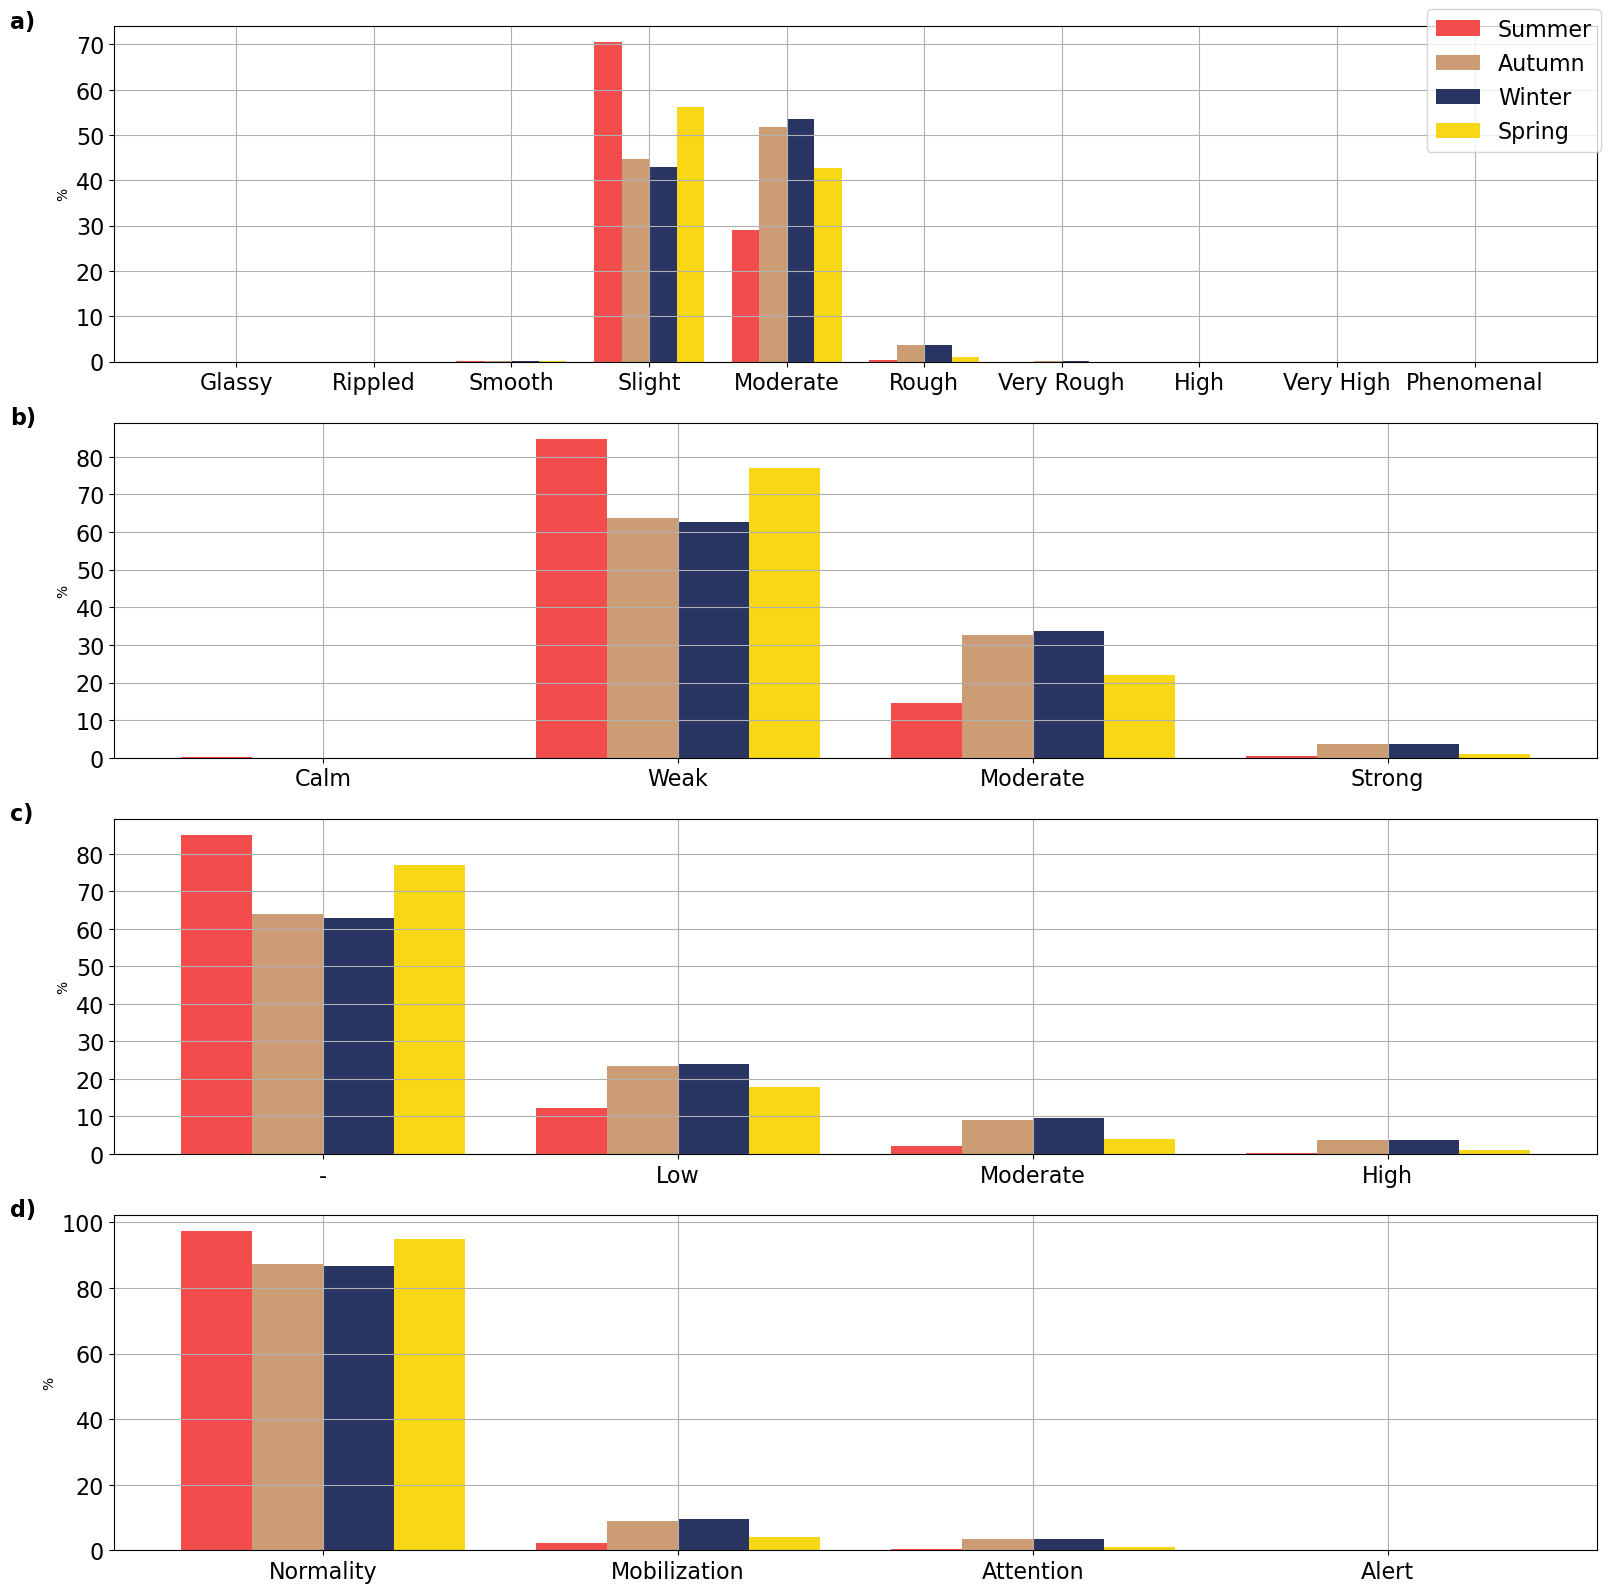

In [75]:
fig = plt.figure(figsize = (16,16))

# fig, ax = plt.subplots(figsize = (18,6))

ax1 = plt.subplot(4, 1, 1)

ax2 = plt.subplot(4, 1, 2)

ax3 = plt.subplot(4, 1, 3)

ax4 = plt.subplot(4, 1, 4)

x = niveis_douglas = ['Glassy','Rippled','Smooth','Slight', 'Moderate','Rough',
         'Very Rough', 'High', 'Very High','Phenomenal']
    
x_axis = np.arange(len(x))


ax1.bar(x_axis-0.3, np.asarray(niveis_douglas_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax1.bar(x_axis-0.1, np.asarray(niveis_douglas_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax1.bar(x_axis+0.1, np.asarray(niveis_douglas_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax1.bar(x_axis+0.3, np.asarray(niveis_douglas_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax1.set_xticks(x_axis, x)
# ax1.legend(fontsize = 16)
ax1.grid()
# ax1.set_yscale('log')
# ax1.set_ylim(1,10**5.6)
ax1.set_ylabel('%')
# ax1.set_ylim(75/100)
ax1.set_yticklabels(range(0,75,10), fontsize = 16)
ax1.set_xticklabels(x, fontsize = 16)

# --------------


x = niveis_cond = ['Calm','Weak','Moderate','Strong']
x_axis = np.arange(len(x))

ax2.bar(x_axis-0.3, np.asarray(niveis_cond_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax2.bar(x_axis-0.1, np.asarray(niveis_cond_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax2.bar(x_axis+0.1, np.asarray(niveis_cond_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax2.bar(x_axis+0.3, np.asarray(niveis_cond_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax2.set_xticks(x_axis, x)
# ax2.legend(fontsize = 16)
ax2.grid()
# ax2.set_yscale('log')
# ax2.set_ylim(1,10**5.6)
ax2.set_ylabel('%')
# ax2.set_ylim(95/100)
ax2.set_yticklabels(range(0,95,10), fontsize = 16)
ax2.set_xticklabels(x, fontsize = 16)
# ax2.set_title('Ocorrência dos Níveis da escala de Condição separado sazonalmente')

# ----------------

x = ['Normality', 'Mobilization', 'Attention', 'Alert']
x_axis = np.arange(len(x))

ax4.bar(x_axis-0.3, np.asarray(niveis_criti_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax4.bar(x_axis-0.1, np.asarray(niveis_criti_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax4.bar(x_axis+0.1, np.asarray(niveis_criti_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax4.bar(x_axis+0.3, np.asarray(niveis_criti_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax4.set_xticks(x_axis, x)
# ax3.legend(fontsize=16)
ax4.grid()
# ax3.set_yscale('log')
# ax3.set_ylim(1,10**5.6)
ax4.set_ylabel('%')
ax4.set_yticklabels(range(0,101,20), fontsize = 16)
ax4.set_xticklabels(x, fontsize = 16)
# ax3.set_xticklabels(x, fontsize = 16)ax3.set_title('Ocorrência dos Níveis da escala de Criticidade separado sazonalmente')

# --------------

x = ['-', 'Low', 'Moderate', 'High']
x_axis = np.arange(len(x))

ax3.bar(x_axis-0.3, np.asarray(niveis_risco_verao_arr)/len(verao)*100, 0.2, label = 'Summer', color='#F24C4C')
ax3.bar(x_axis-0.1, np.asarray(niveis_risco_outono_arr)/len(outono)*100, 0.2, label = 'Autumn', color='#CC9C75')
ax3.bar(x_axis+0.1, np.asarray(niveis_risco_inverno_arr)/len(inverno)*100, 0.2, label = 'Winter', color='#293462')
ax3.bar(x_axis+0.3, np.asarray(niveis_risco_primavera_arr)/len(primavera)*100, 0.2, label = 'Spring', color='#F7D716')

ax3.set_xticks(x_axis, x)
# ax4.legend(fontsize = 16)
ax3.grid()
# ax4.set_yscale('log')
# ax4.set_ylim(1,10**5.6)
ax3.set_ylabel('%')
ax3.set_yticklabels(range(0,101,10), fontsize = 16)
ax3.set_xticklabels(x, fontsize = 16)
# ax4.set_title('Ocorrência dos Níveis da escala de Risco separado sazonalmente')

# bota as letras na frente dos subplots
ax1.text(-0.07, 1.05, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')
ax2.text(-0.07, 1.05, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top')
ax3.text(-0.07, 1.05, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top')
ax4.text(-0.07, 1.05, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top')



# seta a legenda global

legend1 = ax1.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.2, 1))
legend1.set_visible(False)
fig.legend([legend1],
           labels=['Summer', 'Autumn', 'Winter', 'Spring'], loc='upper right', bbox_to_anchor=(1, 1), fontsize=16)


# plt.show()
plt.tight_layout()
plt.savefig(figpath + 'grid_histogram.png')

In [36]:
# plota_histograma_criti('tudo')

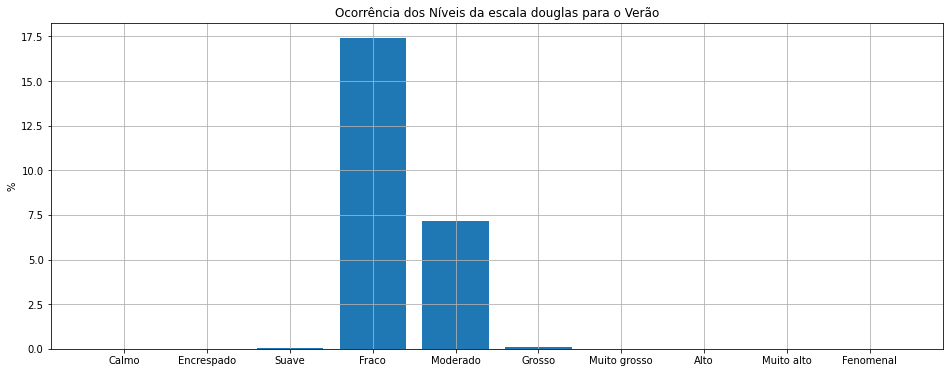

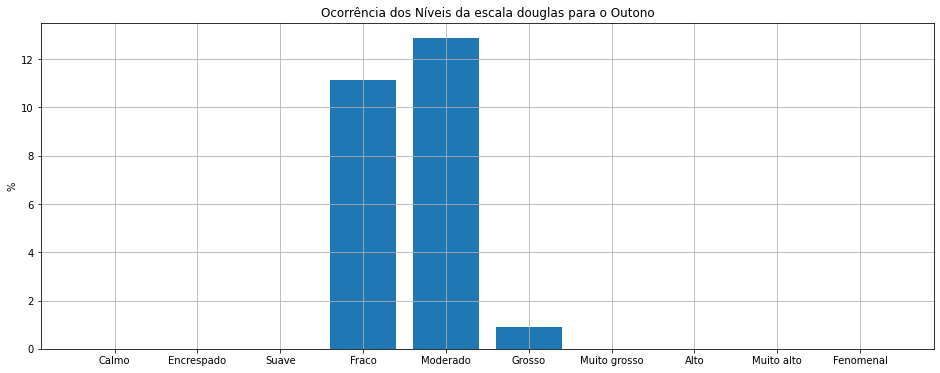

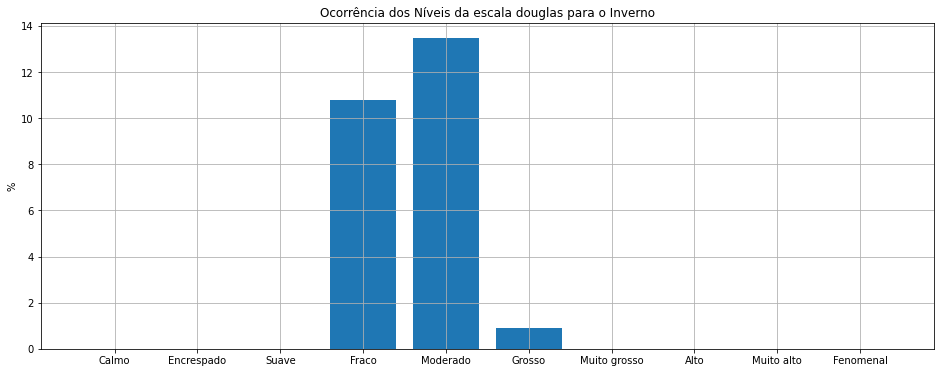

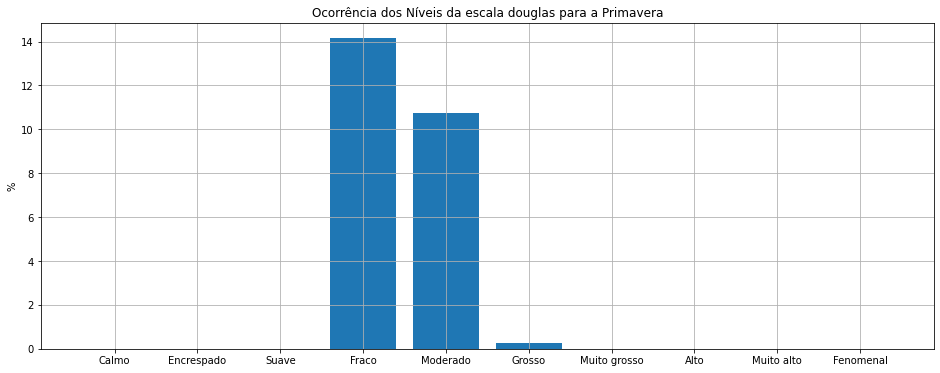

In [35]:
estacoes = ['verao','outono','inverno','primavera']

for estacao in estacoes:
    plota_histograma_douglas(estacao)

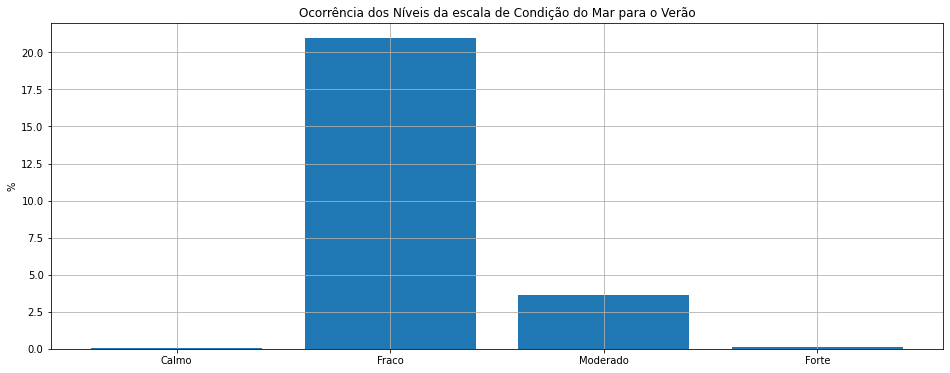

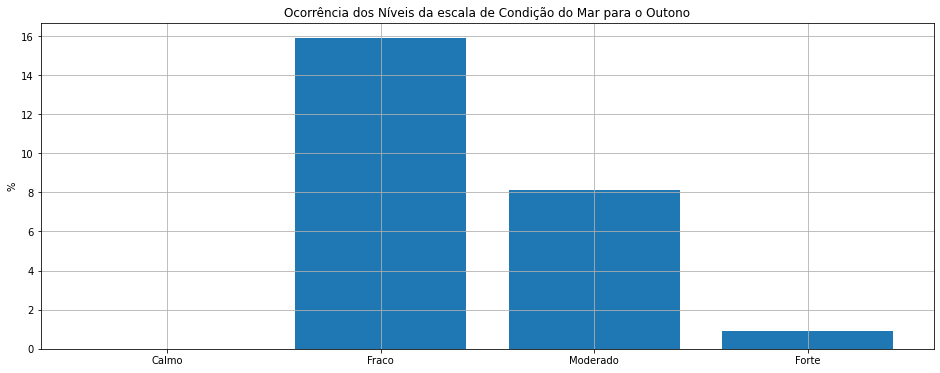

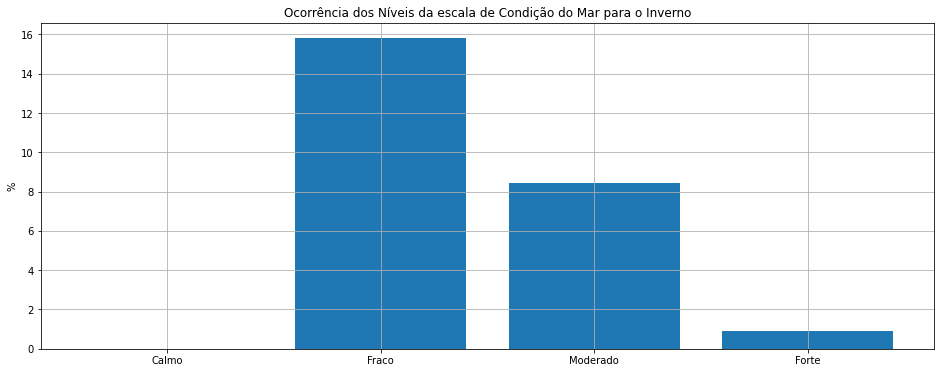

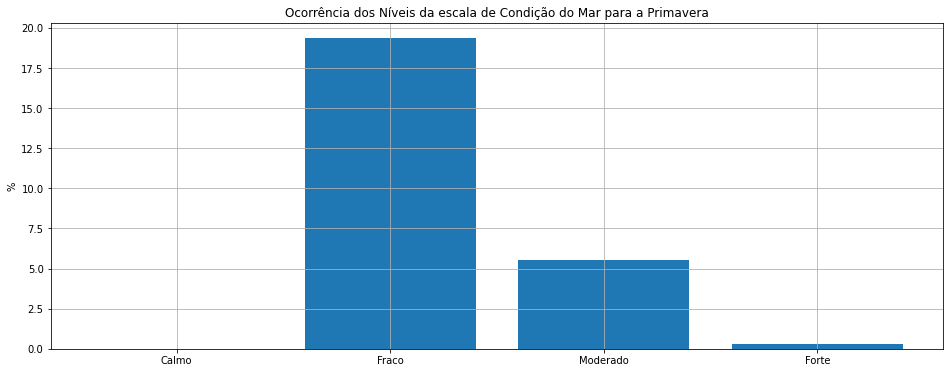

In [36]:
for estacao in estacoes:
    plota_histograma_cond(estacao)

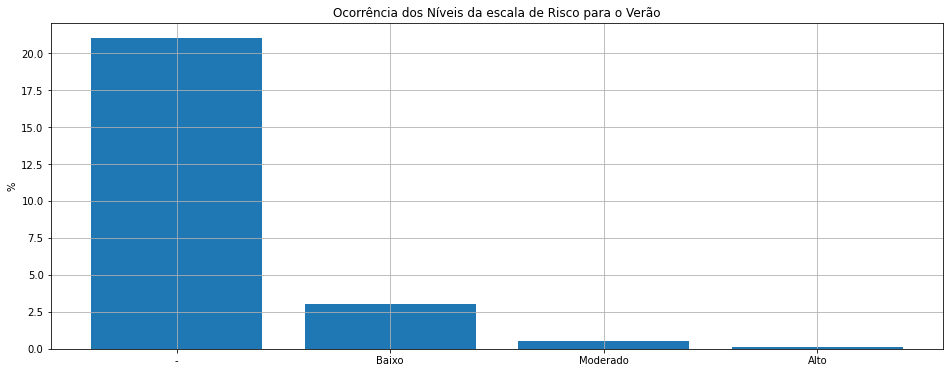

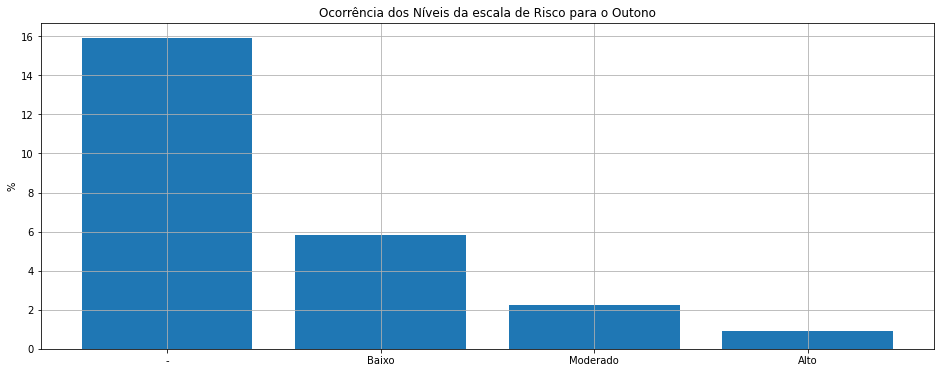

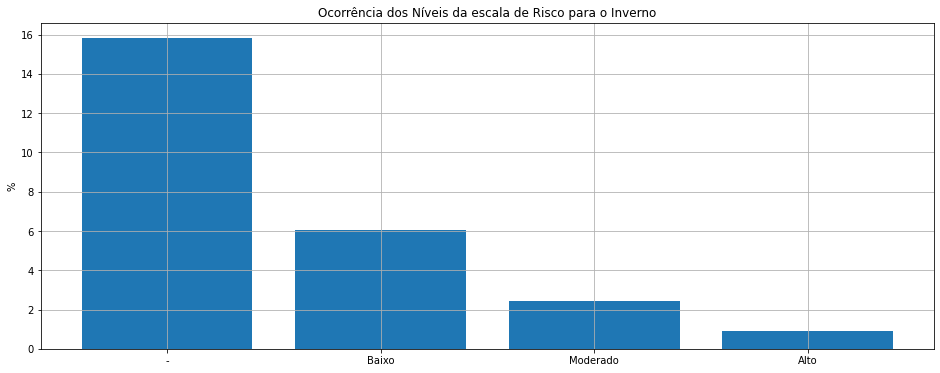

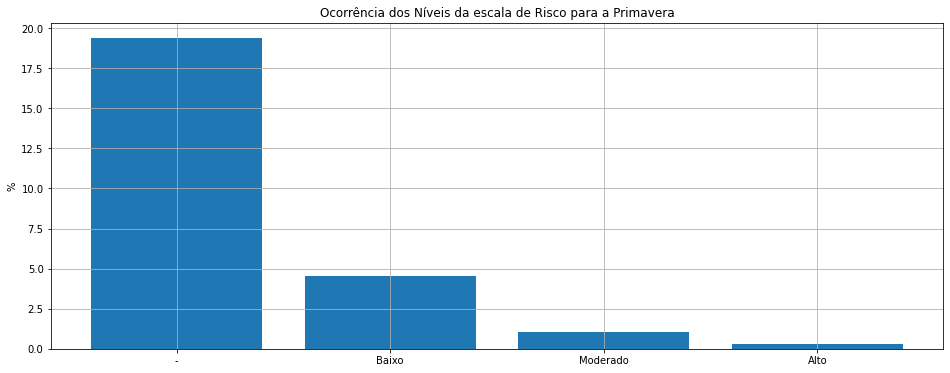

In [37]:
for estacao in estacoes:
    plota_histograma_risco(estacao)

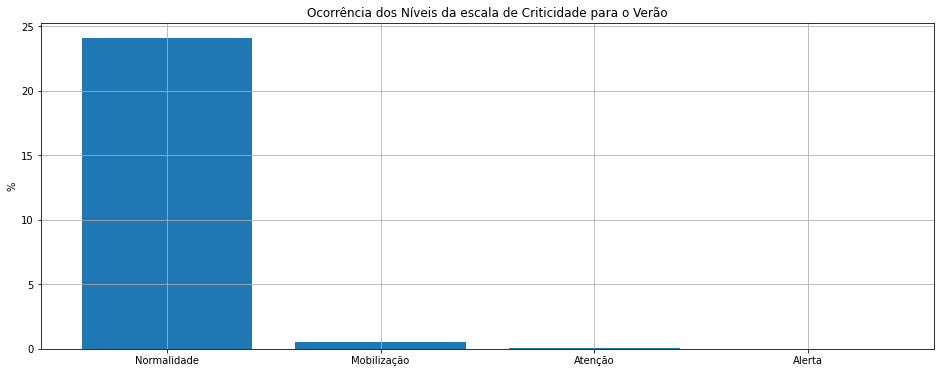

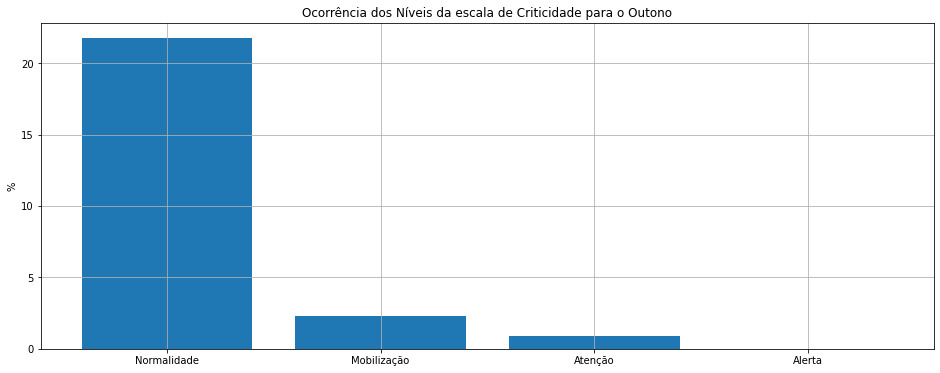

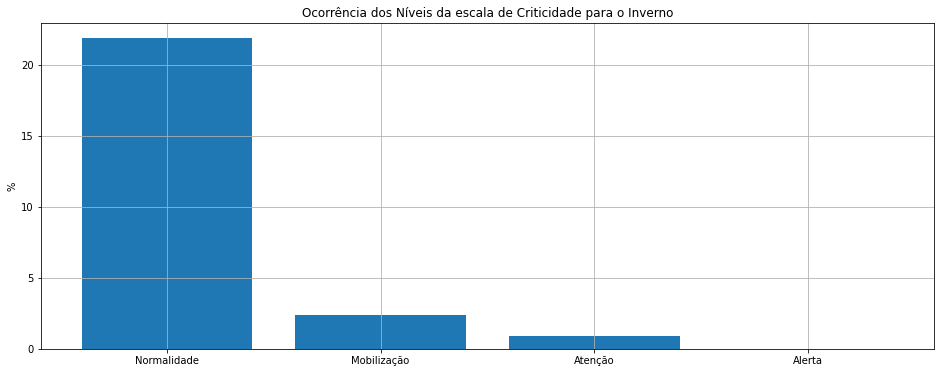

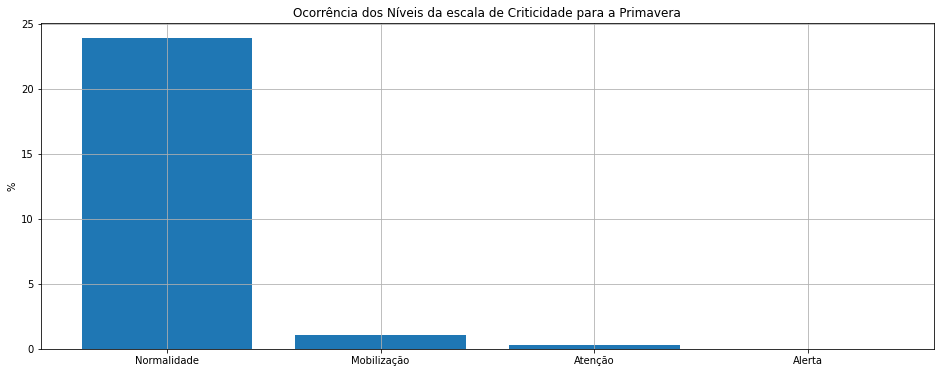

In [38]:
for estacao in estacoes:
    plota_histograma_criti(estacao)

# Plotando evolucao temporal

In [39]:
indice = []
for i in range(1979, 2022):
    indice.append(datetime(i,1,1))

df_to_plot = df_era.resample('1Y').mean()
df_to_plot.index = indice


hsanual = df_to_plot['swh']
del df_to_plot['mwd']
del df_to_plot['pp1d']
del df_to_plot['swh']

In [40]:
df_to_plot = df_to_plot*100

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


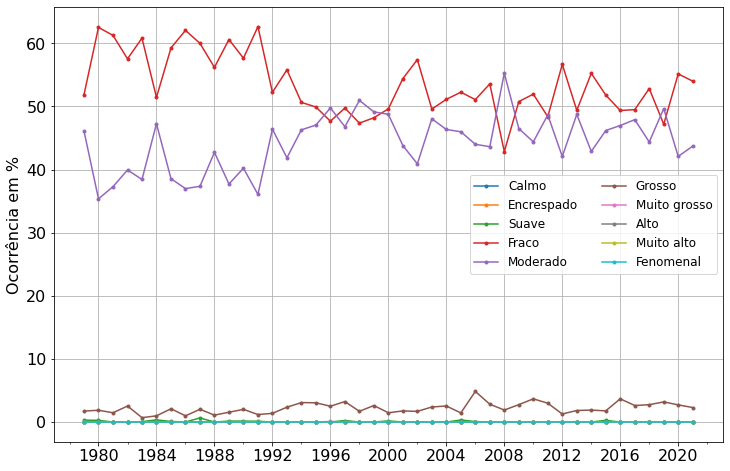

In [258]:
fig, ax = plt.subplots(figsize=(12, 8))
niveis_douglas = ['Calmo','Encrespado','Suave','Fraco', 'Moderado','Grosso',
         'Muito grosso', 'Alto', 'Muito alto','Fenomenal']

for i,j in zip(df_to_plot.columns[:10], niveis_douglas):
    ax.plot(df_to_plot[i], label = j, linestyle = 'solid',marker='.')
    
ax.grid()
# plt.yticks(range(0,5000,500))


# plt.xlim(df_to_plot.index[0], df_to_plot.index[-1], relativedelta(years=2))
#ax.xticks(df_to_plot.index[::5])
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.set_ylabel('Ocorrência em %', fontsize = 16)
half_year_locator = mdates.YearLocator(4)
label2 = mdates.YearLocator(2)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(label2)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.set_xticklabels(range(1976, 2021, 4),fontsize = 16)
ax.set_yticklabels(range(-10,101,10), fontsize = 16)
# ax.set_xticklabels(x, fontsize = 16)
ax.legend(fontsize = 12, loc='right', ncol =2)

# ax.set_title('Evolução temporal dos parâmetros da Escala Douglas')

plt.savefig(figpath + 'evolucao_douglas.png')

TypeError: __init__() got an unexpected keyword argument 'interval'

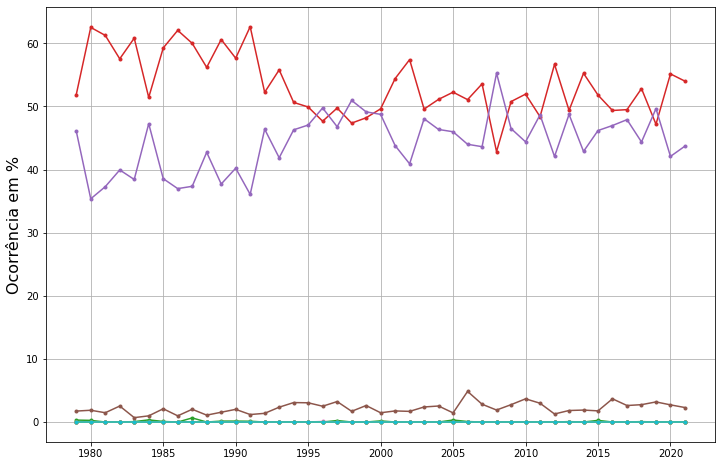

In [230]:
# fig, ax = plt.subplots(figsize=(12, 8))
# niveis_douglas = ['Calmo','Encrespado','Suave','Fraco', 'Moderado','Grosso',
#          'Muito grosso', 'Alto', 'Muito alto','Fenomenal']

# for i,j in zip(df_to_plot.columns[:10], niveis_douglas):
#     ax.plot(df_to_plot[i], label = j, linestyle = 'solid',marker='.')
    
# ax.grid()
# # plt.yticks(range(0,5000,500))


# # plt.xlim(df_to_plot.index[0], df_to_plot.index[-1], relativedelta(years=2))
# #ax.xticks(df_to_plot.index[::5])
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# ax.set_ylabel('Ocorrência em %', fontsize = 16)
# half_year_locator = mdates.MonthLocator(interval=48)
# label2 = mdates.MonthLocator(interval=24)
# year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
# ax.xaxis.set_major_locator(half_year_locator)
# ax.xaxis.set_minor_locator(label2)
# ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
# # ax.set_xticklabels(range(1979, 2021, 4),fontsize = 16)
# ax.set_yticklabels(range(0,101,10), fontsize = 16)

# # ax.set_xticklabels(x, fontsize = 16)
# ax.legend(fontsize = 12, loc='right', ncol =2)

# # ax.set_title('Evolução temporal dos parâmetros da Escala Douglas')

# plt.savefig(figpath + 'evolucao_douglas.png')

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


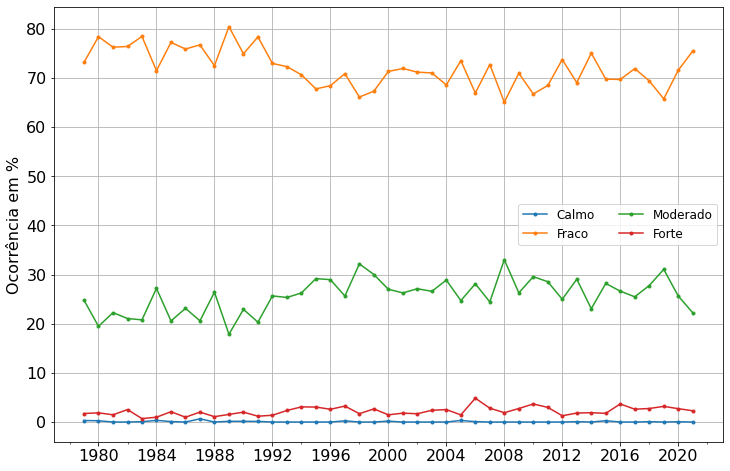

In [257]:
fig, ax = plt.subplots(figsize=(12, 8))
niveis_cond = ['Calmo','Fraco','Moderado','Forte']

for i,j in zip(df_to_plot.columns[10:14], niveis_cond):
    ax.plot(df_to_plot[i], label = j, linestyle = 'solid', marker='.')
    
ax.grid()
# plt.yticks(range(0,5000,500))
# plt.legend()
# plt.title('Evolução temporal dos parâmetros da Escala de Condição')
# plt.ylabel('Ocorrência em %')

ax.set_ylabel('Ocorrência em %', fontsize = 16)
half_year_locator = mdates.YearLocator(4)
label2 = mdates.YearLocator(2)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(label2)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.set_xticklabels(range(1976, 2021, 4),fontsize = 16)
ax.set_yticklabels(range(-10,101,10), fontsize = 16)
# ax.set_xticklabels(x, fontsize = 16)
ax.legend(fontsize = 12, loc='right', ncol =2)


plt.savefig(figpath + 'evolucao_cond.png')

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


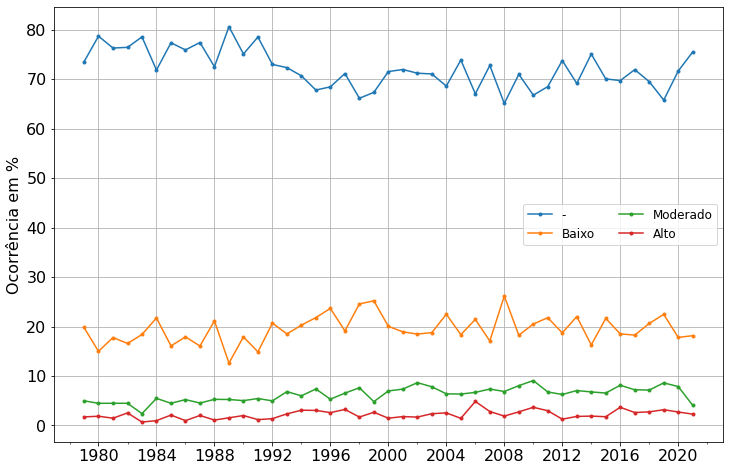

In [259]:
fig, ax = plt.subplots(figsize=(12, 8))
niveis_risco = ['-', 'Baixo', 'Moderado', 'Alto']

for i,j in zip(df_to_plot.columns[14:18], niveis_risco):
    ax.plot(df_to_plot[i], label = j, linestyle = 'solid', marker='.')
    
ax.grid()
# plt.yticks(range(0,5000,500))
# plt.legend()
# plt.title('Evolução temporal dos parâmetros da Escala de risco')
# plt.ylabel('Ocorrência em %')

ax.set_ylabel('Ocorrência em %', fontsize = 16)
half_year_locator = mdates.YearLocator(4)
label2 = mdates.YearLocator(2)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(label2)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.set_xticklabels(range(1976, 2021, 4),fontsize = 16)
ax.set_yticklabels(range(-10,81,10), fontsize = 16)
# ax.set_xticklabels(x, fontsize = 16)
ax.legend(fontsize = 12, loc='right', ncol =2)


plt.savefig(figpath + 'evolucao_risco.png')

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


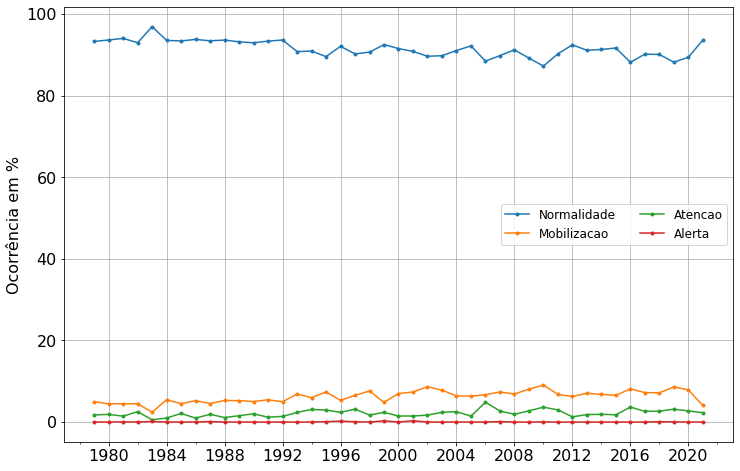

In [263]:
fig, ax = plt.subplots(figsize=(12,8))
niveis_criti = ['Normalidade', 'Mobilizacao', 'Atencao', 'Alerta']

for i,j in zip(df_to_plot.columns[18:22], niveis_criti):
    ax.plot(df_to_plot[i], label = j, linestyle = 'solid', marker='.')
    
ax.grid()
# ax.legend()
# plt.title('Evolução temporal dos parâmetros da Escala de Criticidade')
ax.set_ylabel('Ocorrência em %', fontsize = 16)
half_year_locator = mdates.YearLocator(4)
label2 = mdates.YearLocator(2)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(label2)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.set_xticklabels(range(1976, 2021, 4),fontsize = 16)
ax.set_yticklabels(range(-20,101,20), fontsize = 16)
# ax.set_xticklabels(x, fontsize = 16)
ax.legend(fontsize = 12, loc='right', ncol =2)


plt.savefig(figpath + 'evolucao_criti.png')

# Plota Hs Anual

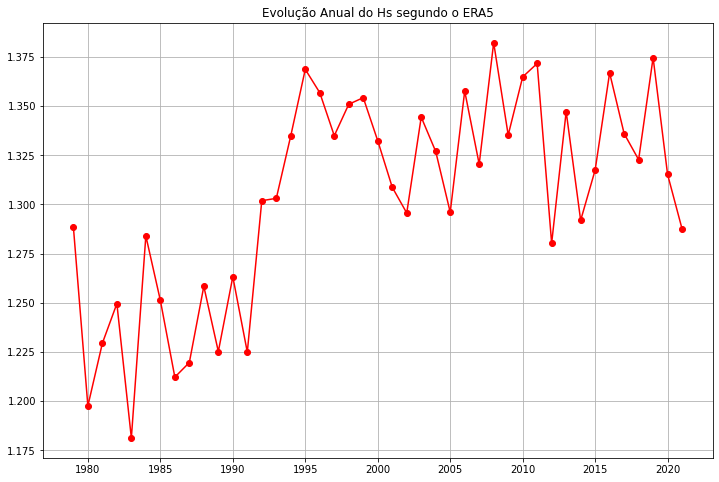

In [45]:
fig = plt.figure(figsize=(12,8))

plt.plot(hsanual, color = 'red', marker='o')
# plt.plot(np.zeros(len(hsanual)) + hsanual.mean())

plt.grid()
plt.title('Evolução Anual do Hs segundo o ERA5')
# plt.ylim([1.17, 1.38])

plt.savefig(figpath + 'evolucao_hs.png')

In [46]:
df_era['condc'] = 0.5
df_era['condf'] = 1.5
df_era['condm'] = 2.5

df_era['ris-'] = 1.5
df_era['risb'] = 2
df_era['rism'] = 2.5

df_era['crin'] = 2
df_era['crim'] = 2.5
df_era['cria'] = 3.5

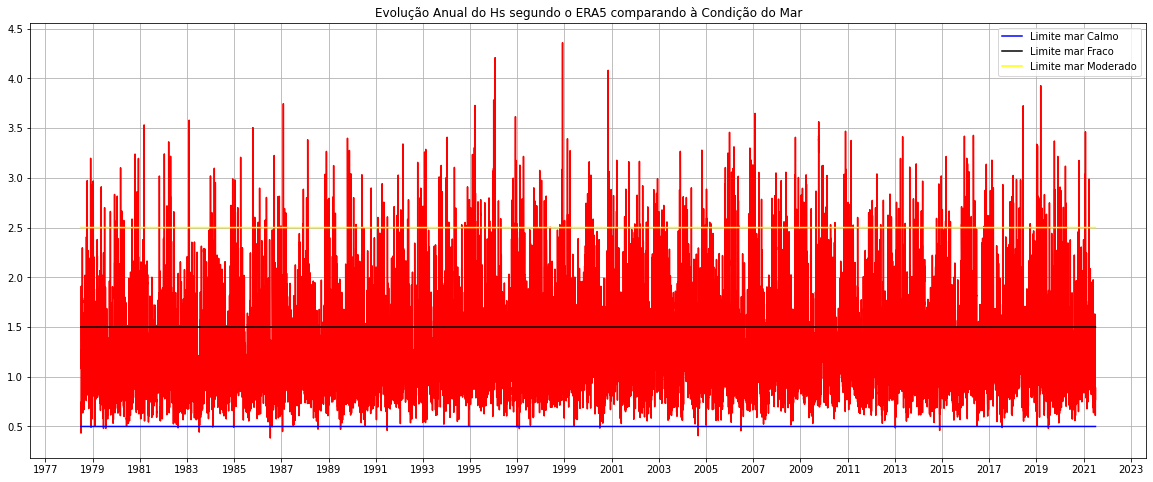

In [47]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_era['swh'], color = 'red') #, marker='o')
# plt.plot(np.zeros(len(hsanual)) + hsanual.mean())

ax.grid()
ax.set_title('Evolução Anual do Hs segundo o ERA5 comparando à Condição do Mar')


half_year_locator = mdates.MonthLocator(interval=24)

ax.plot(df_era['condc'], color = 'blue', label='Limite mar Calmo')
ax.plot(df_era['condf'], color = 'black', label = 'Limite mar Fraco')
ax.plot(df_era['condm'], color = 'yellow', label = 'Limite mar Moderado')


year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.legend()

# plt.ylim([1.17, 1.38])

plt.savefig(figpath + 'evolucao_hs_condicao.png')

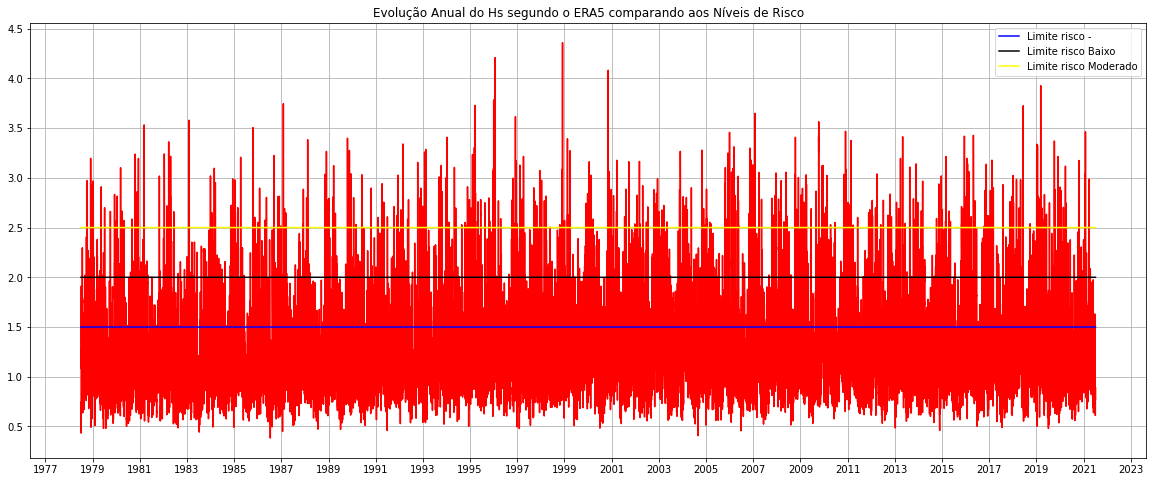

In [48]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_era['swh'], color = 'red') #, marker='o')
# plt.plot(np.zeros(len(hsanual)) + hsanual.mean())

ax.grid()
ax.set_title('Evolução Anual do Hs segundo o ERA5 comparando aos Níveis de Risco')


half_year_locator = mdates.MonthLocator(interval=24)

ax.plot(df_era['ris-'], color = 'blue', label='Limite risco -')
ax.plot(df_era['risb'], color = 'black', label = 'Limite risco Baixo')
ax.plot(df_era['rism'], color = 'yellow', label = 'Limite risco Moderado')

# df_era['condf'] = 1.5
# df_era['condm'] = 2.5

year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.legend()

# plt.ylim([1.17, 1.38])

plt.savefig(figpath + 'evolucao_hs_risco.png')

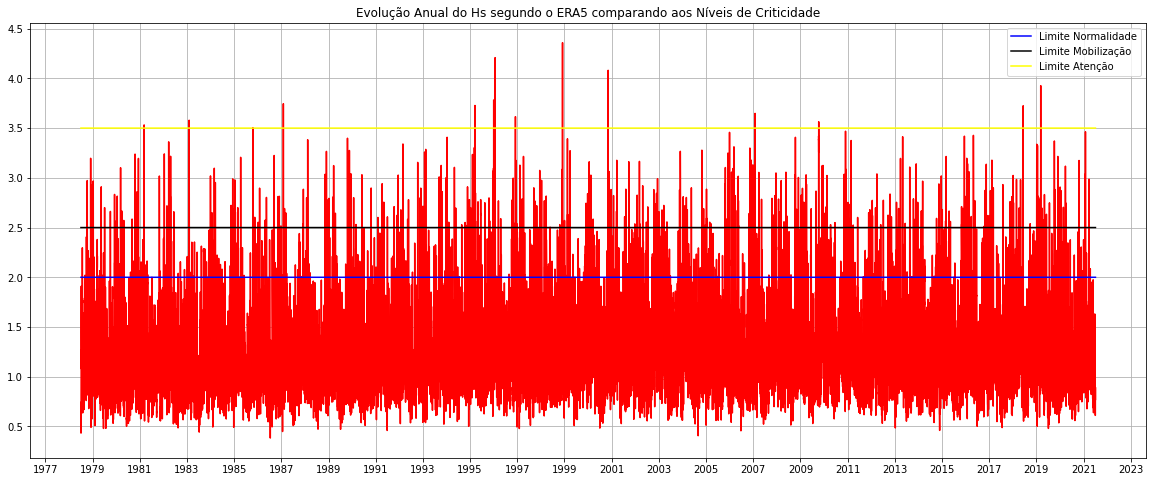

In [49]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(df_era['swh'], color = 'red') #, marker='o')
# plt.plot(np.zeros(len(hsanual)) + hsanual.mean())

ax.grid()
ax.set_title('Evolução Anual do Hs segundo o ERA5 comparando aos Níveis de Criticidade')


half_year_locator = mdates.MonthLocator(interval=24)

ax.plot(df_era['crin'], color = 'blue', label='Limite Normalidade')
ax.plot(df_era['crim'], color = 'black', label = 'Limite Mobilização')
ax.plot(df_era['cria'], color = 'yellow', label = 'Limite Atenção')

# df_era['condf'] = 1.5
# df_era['condm'] = 2.5

year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.legend()

# plt.ylim([1.17, 1.38])

plt.savefig(figpath + 'evolucao_hs_criticidade.png')